In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import os
import time
import io
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


def initialization(seed=42):
    keras.backend.clear_session()
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [2]:
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='../Fonts/SourceHanSerifSC-Medium.otf', size=14)

# Á•ûÁªèÊú∫Âô®ÁøªËØëÁöÑÁºñÁ†ÅÂô®-Ëß£Á†ÅÂô®Ê®°Âûã An Encoder-Decoder Network for Nerual Machine Translation

## ÁºñÁ†ÅÂô®ÂíåËß£Á†ÅÂô® Encoder and Decoder

- **ÁºñÁ†ÅÂô®**
    - Âá†‰∏™Âæ™ÁéØÂçïÂÖÉÁöÑÂ†ÜÂè†, ÊØè‰∏™ÂçïÂÖÉÊé•ÂèóÊé•ÂèóËæìÂÖ•Â∫èÂàóÁöÑÂçï‰∏™ÂÖÉÁ¥†, Êî∂ÈõÜÂÖ∂‰ø°ÊÅØÂπ∂ËøõË°åÂâçÂêë‰º†Êí≠
    - Âú®ÈóÆÁ≠îÁ≥ªÁªü‰∏≠,ËæìÂÖ•Â∫èÂàóÊòØÈóÆÈ¢ò‰∏≠ÊâÄÊúâÂçïËØçÁöÑÈõÜÂêà. ÊØè‰∏™ÂçïËØçË°®Á§∫$X_i$, $i$ Ë°®Á§∫ËØ•ÂçïËØçÁöÑÈ°∫Â∫è.
    - ÊôÆÈÄöÁöÑRNN‰∏≠, ÈöêËóèÁä∂ÊÄÅ $h_i$ ‰ΩøÁî®‰ª•‰∏ãÂÖ¨ÂºèËÆ°ÁÆóÔºö 

        <img src="../images/other/16-5.png" width="500">
    - ÁºñÁ†ÅÂô®ÂêëÈáèÊòØÊ®°ÂûãÁöÑÁºñÁ†ÅÂô®ÈÉ®ÂàÜ‰∫ßÁîüÁöÑÊúÄÁªàÈöêËóèÁä∂ÊÄÅ„ÄÇËØ•ÂêëÈáèÊó®Âú®Â∞ÅË£ÖÊâÄÊúâËæìÂÖ•ÂÖÉÁ¥†ÁöÑ‰ø°ÊÅØÔºå‰ª•Â∏ÆÂä©Ëß£Á†ÅÂô®ÂÅöÂá∫ÂáÜÁ°ÆÁöÑÈ¢ÑÊµã„ÄÇÂÆÉÂÖÖÂΩìÊ®°ÂûãËß£Á†ÅÂô®ÈÉ®ÂàÜÁöÑÂàùÂßãÈöêËóèÁä∂ÊÄÅ„ÄÇ



- **Ëß£Á†ÅÂô®**
    - ‰ΩøÁî®Ââç‰∏Ä‰∏™ÈöêËóèÁä∂ÊÄÅÊù•ËÆ°ÁÆó‰∏ã‰∏Ä‰∏™ÈöêËóèÁä∂ÊÄÅ:$h_t=f(W^{hh}h_{t-1})$
    - Êó∂Èó¥Ê≠• $t$ ÁöÑËæìÂá∫ $y_t$ ‰ΩøÁî®‰ª•‰∏ãÂÖ¨ÂºèËÆ°ÁÆóÔºö$y_t=softmax(W^Sh_t)$

   <img src="../images/other/16-4.png" width="500">

1. ÁºñÁ†ÅÂô®ÂíåËß£Á†ÅÂô®ÈÉΩ‰ºöÊé•ÂèóËæìÂÖ•, ÂÖ∂‰∏≠Ëß£Á†ÅÂô®ÁöÑËæìÂÖ•‰ºöÂêëÂêéÂÅèÁßª‰∏Ä‰Ωç, ‰ª•`<SOS>`‰ª§Áâå‰Ωú‰∏∫Â∫èÂàóÂºÄÂßã, ÁºñÁ†ÅÂô®‰ª•`<EOS>`‰ª§Áâå‰Ωú‰∏∫ËæìÂÖ•Â∫èÂàóÁöÑÁªìÊùü.
2. Â¶Ç‰∏äÂõæÊâÄÁ§∫, **Ëã±ÊñáÂè•Â≠êÂú®ËæìÂÖ•Âà∞ÁºñÁ†ÅÂô®‰πãÂâç‰ºöË¢´È¢†ÂÄí**„ÄÇËøôÁ°Æ‰øù‰∫ÜËã±ËØ≠Âè•Â≠êÁöÑÂºÄÂ§¥Â∞ÜÊúÄÂêéË¢´È¶àÈÄÅÂà∞ÁºñÁ†ÅÂô®.
3. ÊØè‰∏™ÂçïËØçÊúÄÂàùÈÉΩÁî±ÂÖ∂ ID Ë°®Á§∫Ôºà‰æãÂ¶ÇÔºåÂçïËØç‚Äúmilk‚ÄùÁöÑ ID ‰∏∫ 288Ôºâ„ÄÇÊé•‰∏ãÊù•ÔºåÂµåÂÖ•Â±ÇËøîÂõûËØçÂµåÂÖ•„ÄÇËøô‰∫õËØçÂµåÂÖ•ÂÆûÈôÖ‰∏äÊòØÈ¶àÈÄÅÂà∞`ÁºñÁ†ÅÂô®`Ôºà‰∏Ä‰∏™Â∫èÂàóÂà∞ÂêëÈáèÁΩëÁªúÔºåÁºñÁ†ÅÂô®‰ºöÂ∞ÜËøô‰∏™Âè•Â≠êÔºàËØçÂµåÂÖ•ÔºâËΩ¨Êç¢‰∏∫Âçï‰∏™ÂêëÈáèË°®Á§∫ÔºâÂíå`Ëß£Á†ÅÂô®`Ôºà‰∏Ä‰∏™ÂêëÈáèÂà∞Â∫èÂàóÁΩëÁªúÔºåËß£Á†ÅËøô‰∏™ÂêëÈáèÊàêÂè¶‰∏ÄÁßçËØ≠Ë®ÄÁöÑÂè•Â≠êÔºâ„ÄÇ
4. Âú®ÊØè‰∏™Ê≠•Èïø,`ÁºñÁ†ÅÂô®`‰ºöËæìÂá∫Âú®ËØçÊ±áË°®‰∏≠ÊØè‰∏™ÂçïËØçÁöÑÂàÜÊï∞, ‰ΩøÁî®`Softmax`ÂΩí‰∏ÄÂåñËΩ¨Êç¢‰∏∫Ê¶ÇÁéá, ÊúÄÈ´òÁöÑÊ¶ÇÁéá‰ºöË¢´ËæìÂá∫.
5. Âú®Êé®ÁêÜÊúüÈó¥Â∞Ü‰ª•ÂâçÁöÑËæìÂá∫ÂçïËØç‰Ωú‰∏∫ËæìÂÖ•.
    <img src="../images/other/16-6.png" width="300">

‰ªçÊúâ‰∏Ä‰∫õÁªÜËäÇÈúÄË¶ÅÂ§ÑÁêÜ:
1. **ÂØπ‰∫é‰∏çÂÆöÈïøÁöÑÂ∫èÂàó**, Áî±‰∫éËßÑÂàôÂº†ÈáèÂÖ∑ÊúâÂõ∫ÂÆöÂΩ¢Áä∂, Âõ†Ê≠§Âè™ËÉΩÂÆπÁ∫≥Áõ∏ÂêåÈïøÂ∫¶ÁöÑÂè•Â≠ê. ÂèØ‰ª•‰ΩøÁî®**Êé©Á†Å**Â§ÑÁêÜÊ≠§ÈóÆÈ¢ò, ‰ΩÜÊòØÂ¶ÇÊûú**ÈïøÂ∫¶Êà™ÁÑ∂‰∏çÂêå**, Â∞±Êó†Ê≥ïÂÉèÊÉÖÊÑüÂàÜÊûê‰∏ÄÊ†∑‰ªÖ‰ªÖË£ÅÂâ™Â∞±ÂèØ‰ª•.
    - ÂèØ‰ª•Â∞ÜÂè•Â≠êÂàÜ‰∏∫Áõ∏‰ººÈïøÂ∫¶ÁöÑ‰∏ÄÁªÑ, ËæÉÁü≠ÁöÑÂ∫èÂàó‰ΩøÁî®Â°´ÂÖÖÁ°Æ‰øù‰∏ÄÁªÑ‰∏≠ÊâÄÊúâÁöÑÂè•Â≠êÈÉΩÂÖ∑ÊúâÁõ∏ÂêåÁöÑÈïøÂ∫¶.
        ```python
        tf.data.erxperimental.bucket_by_sequence_length()
        #  "I drink milk" --> <pad> <pad> <pad> milk drink I."
        ```
       
2. ÂøΩÁï•`<EOS>`‰ª§ÁâåÂêéÁöÑÊâÄÊúâËæìÂá∫, Â∞ÜÂÖ∂Â±èËîΩ.
3. ÂΩìËæìÂá∫ËØçÊ±áÈáèÂæàÂ§ßÊó∂, ‰∏∫ÊØè‰∏™ÂèØËÉΩÁöÑÂçïËØçËæìÂá∫Ê¶ÇÁéá‰ºöÈùûÂ∏∏ÊÖ¢, Âõ†‰∏∫ÈúÄË¶ÅËøõË°åÂ§ßÈáèÁöÑËÆ°ÁÆó.
      - ‰ΩøÁî®`Sampled-softmax`ËÆ≠ÁªÉÊñπÊ≥ïÊù•Âä†ÈÄüËÆ≠ÁªÉ: ‰ªÖÊü•ÁúãÊ®°Âûã‰∏∫Ê≠£Á°ÆÂçïËØçÂíå‰∏çÊ≠£Á°ÆÂçïËØçÈöèÊú∫Ê†∑Êú¨ÁöÑ `logits` , ÁÑ∂Âêé‰ªÖÂü∫‰∫éËøô‰∫õ `logits` ËÆ°ÁÆóÊçüÂ§±ÁöÑËøë‰ººÂÄº„ÄÇ
        ```python
          # ËÆ≠ÁªÉÊó∂‰ΩøÁî®
          tf.nn.sampled_softmax_loss()
        ```
         Êé®Êñ≠Êó∂‰ΩøÁî®`softmax`ÂáΩÊï∞, `Sampled-softmax`‰∏çËÉΩÂú®Êé®ÁêÜÊó∂‰ΩøÁî®ÔºåÂõ†‰∏∫ÂÆÉÈúÄË¶ÅÁü•ÈÅìÁõÆÊ†á„ÄÇ
         
         ËØ¶ÊÉÖ: https://mp.weixin.qq.com/s/5Z3pAZNTuoyBjcnTkZmpPw

- **ÂõûÈ°æLSTM**
 - <img src="../images/other/15-15.png" width="500">
 - `keras`‰∏≠‰ΩøÁî®`keras.layers.LSTM()`ÂÆûÁé∞ÈïøÁü≠ÊúüËÆ∞ÂøÜÁΩëÁªú.
```python
lstm, state_h, state_c = LSTM(, return_state=True)
# ËøîÂõûÔºö
# lstmÔºöÊØè‰∏™Êó∂Èó¥Ê≠•ÁöÑÈöêËóèÁä∂ÊÄÅ
# state_hÔºöÊúÄÂêé‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑÈöêËóèÁä∂ÊÄÅ
# state_cÔºöÊúÄÂêé‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑcellÁä∂ÊÄÅ
```

###  TensorFlow Addons Á§∫‰æã

`TensorFlow Addons` È°πÁõÆÂåÖÊã¨ËÆ∏Â§öÂ∫èÂàóÂà∞Â∫èÂàóÂ∑•ÂÖ∑ÔºåËÆ©ÊÇ®ËΩªÊùæÊûÑÂª∫Áîü‰∫ßÂ∞±Áª™ÁöÑÁºñÁ†ÅÂô®-Ëß£Á†ÅÂô®„ÄÇ
- `TrainingSampler` ÊòØ `TensorFlow Addons` ‰∏≠Êèê‰æõÁöÑÂá†‰∏™ÈááÊ†∑Âô®‰πã‰∏ÄÔºöÂÆÉ‰ª¨ÁöÑ‰ΩúÁî®ÊòØÂú®ÊØè‰∏ÄÊ≠•ÂëäËØâËß£Á†ÅÂô®ÂÆÉÂ∫îËØ•ÂÅáË£Ö‰πãÂâçÁöÑËæìÂá∫ÁöÑÂÜÖÂÆπ„ÄÇ
    - Âú®Êé®ÁêÜËøáÁ®ã‰∏≠ÔºåËøôÂ∫îËØ•ÊòØÂÆûÈôÖËæìÂá∫ÁöÑ‰ª§ÁâåÁöÑÂµåÂÖ•.
    - Âú®ËÆ≠ÁªÉÊúüÈó¥ÔºåÂ∫îËØ•ÊòØ‰πãÂâçÁõÆÊ†áÊ†áËÆ∞ÁöÑÂµåÂÖ•.
    
- Âú®ÂÆûË∑µ‰∏≠Ôºå‰ªé‰∏ä‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑÁõÆÊ†áÂµåÂÖ•ÂºÄÂßãËÆ≠ÁªÉ, ÁÑ∂ÂêéÈÄêÊ∏êËΩ¨Êç¢Âà∞ ‰ΩøÁî®‰∏ä‰∏ÄÊ≠•ËæìÂá∫ÁöÑÂÆûÈôÖ‰ª§ÁâåÁöÑÂµåÂÖ• ÊòØ‰∏Ä‰∏™Â•Ω‰∏ªÊÑè„ÄÇ 
- `ScheduledEmbeddingTrainingSampler`: Â∞ÜÂú®ÁõÆÊ†áÊàñÂÆûÈôÖËæìÂá∫‰ΩøÁî®‰∏Ä‰∏™Ê¶ÇÁéáÂÄºÂÅöÈöèÊú∫ÈÄâÊã©ÔºåÊÇ®ÂèØ‰ª•Âú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÈÄêÊ∏êÊîπÂèòÁöÑÊ¶ÇÁéá„ÄÇ

- ÂàõÂª∫‰∫Ü‰∏Ä‰∏™Âü∫Êú¨ÁöÑÁºñÁ†ÅÂô®-Ëß£Á†ÅÂô®Ê®°ÂûãÔºåÁ±ª‰ºº‰∫é‰∏ãÂõæÊâÄÁ§∫ÁöÑÊ®°Âûã

   <img src="../images/other/16-4.png" width="500">

In [3]:
import tensorflow_addons as tfa

In [4]:
initialization(42)

vocab_size = 100
embed_size = 10

In [5]:
embeddings = keras.layers.Embedding(input_dim=vocab_size,
                                    output_dim=embed_size)
sequence_lengths = keras.layers.Input(shape=[], dtype=np.int32)

In [6]:
# ÁºñÁ†ÅÂô®
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
encoder_embeddings = embeddings(encoder_inputs)

encoder = keras.layers.LSTM(512, return_state=True)
# return_state=True: Ëé∑ÂèñÂÖ∂ÊúÄÁªàÁöÑÈöêËóèÁä∂ÊÄÅÂπ∂Â∞ÜÂÆÉ‰º†ÈÄíÁªôËß£Á†ÅÂô®
# LSTMÂ∞ÜËøîÂõû‰∏§ÁßçÈöêËóèÁä∂ÊÄÅ:ÈïøÊúüÁä∂ÊÄÅC_t, Áü≠ÊúüÁä∂ÊÄÅh_t
encoder_output, state_h, state_c = encoder(encoder_embeddings)
encoder_state = [state_h, state_c]

# Ëß£Á†ÅÂô®
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
decoder_embeddings = embeddings(decoder_inputs)

# ‰∏∫‰ªÄ‰πà‰ΩøÁî® `keras.layers.LSTMCell`Ôºü
# - Âú®Êé®ÁêÜËøáÁ®ã‰∏≠ÔºåÊàë‰ª¨‰ΩøÁî®‰∏ÄÊ≠•ËæìÂá∫‰Ωú‰∏∫‰∏ã‰∏ÄÊ≠•ËæìÂÖ•
# - keras.layers.LSTMCell Â§ÑÁêÜÊï¥‰∏™Êó∂Â∫èËæìÂÖ•‰∏≠ÁöÑ‰∏ÄÊ≠•
decoder_cell = keras.layers.LSTMCell(512)  # ‰∏ÄÊ≠•ÊàñÊòØ‰∏Ä‰∏™ÂçïËØç
sampler = tfa.seq2seq.sampler.TrainingSampler()  # ÈááÊ†∑Âô®
output_layer = keras.layers.Dense(vocab_size)  # ‰∏Ä‰∏™ËØçÂØπÂ∫î‰∏Ä‰∏™ÂêëÈáè

decoder = tfa.seq2seq.basic_decoder.BasicDecoder(cell=decoder_cell,
                                                 sampler=sampler,
                                                 output_layer=output_layer)

final_outputs, final_state, final_sequence_lengths = decoder(
    decoder_embeddings,
    initial_state=encoder_state,
    sequence_length=sequence_lengths)

y_proba = tf.nn.softmax(final_outputs.rnn_output)

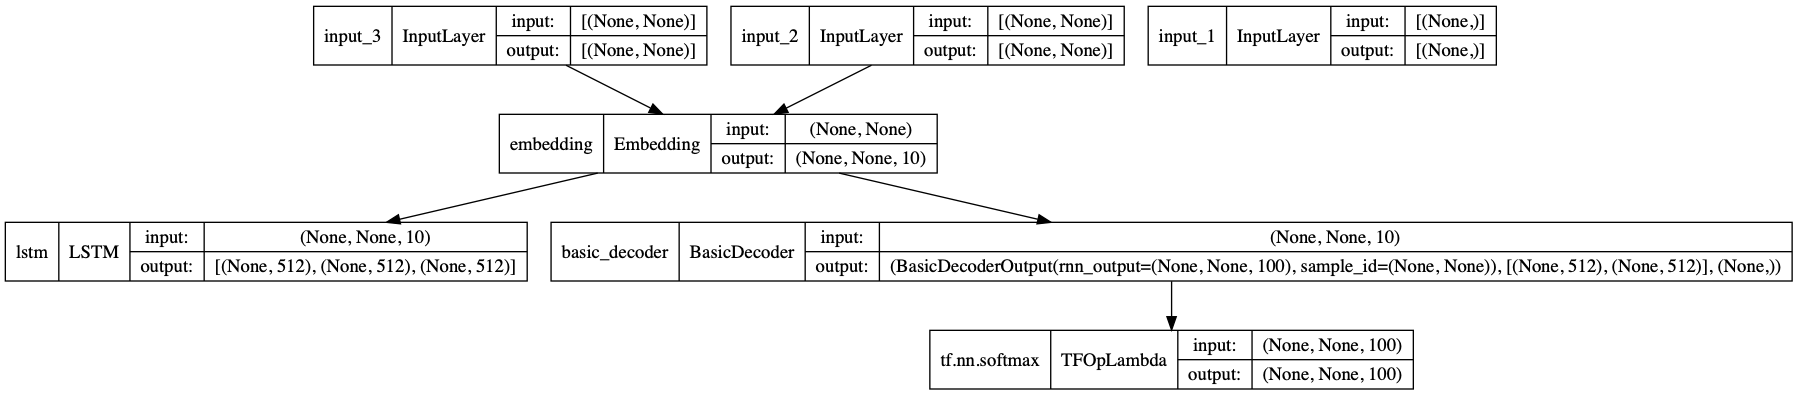

In [7]:
model = keras.Model(inputs=[encoder_inputs, decoder_inputs, sequence_lengths],
                    outputs=[y_proba])
keras.utils.plot_model(model,
                       "../models/plot_model/Encoder-Decoder_model_1.png",
                       show_shapes=True)

In [8]:
X = np.random.randint(100, size=10*1000).reshape(1000,10) # 10 words, batch_size=1000
y = np.random.randint(100, size=15*1000).reshape(1000,15) # 15 target words

# Ëß£Á†ÅÂô®ÁöÑËæìÂÖ•‰ºöÂêëÂêéÂÅèÁßª‰∏Ä‰Ωç
X_decoder = np.c_[np.zeros(shape=(1000,1)), y[:,:-1]]
# Âõ∫ÂÆöÊØè‰∏™Âè•Â≠êÁöÑseq_lengths‰∏∫15
seq_lengths = np.full(shape=[1000,], fill_value=15)

In [9]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer="adam")
history = model.fit([X, X_decoder, seq_lengths],y,
                    epochs=1)

2022-05-19 12:59:38.786756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-19 12:59:43.471933: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


32/32 [==============================] - 8s 69ms/step - loss: 4.6052


## ÁºñÁ†ÅÂô®-Ëß£Á†ÅÂô®Á§∫‰æãÁª≠

> ËÆ≠ÁªÉÂèØ‰ª•Â∞ÜÊó•ÊúüÂ≠óÁ¨¶‰∏≤‰ªé‰∏ÄÁßçÊ†ºÂºèËΩ¨Êç¢‰∏∫Âè¶‰∏ÄÁßçÊ†ºÂºèÁöÑÁºñÁ†ÅÂô®-Ëß£Á†ÅÂô®Ê®°Âûã
>
> ‰æãÂ¶Ç:‰ªé`April 22, 2019` ËΩ¨Êç¢‰∏∫ `2019-04-22`.

### ÁîüÊàêÊï∞ÊçÆ Generate data

In [10]:
from datetime import datetime
from datetime import date

# date.fromordinal(): ËøîÂõûÂØπÂ∫î‰∫éÈ¢ÑÊúüÊ†ºÂàóÈ´òÂà©ÂéÜÂ∫èÂè∑ÁöÑÊó•Êúü
dt = date.fromordinal(1)
dt, dt.strftime("%d, %Y"), dt.isoformat()

(datetime.date(1, 1, 1), '01, 1', '0001-01-01')

In [11]:
# date.toordinal(): ËøîÂõûÂØπÂ∫î‰∫éÂÖ¨ÂéÜÊ†ºÈáåÈ´òÂà©Â∫èÊï∞ÁöÑÊó•Êúü,ÂÖ∂‰∏≠Á¨¨1Âπ¥1Êúà1Êó•ÊúâÂ∫èÊï∞1.
dt = datetime.now() # Ëé∑ÂèñÂΩìÂâçÊó•ÊúüÊó∂Èó¥
ordinal_dt = date.toordinal(dt)
dt, ordinal_dt

(datetime.datetime(2022, 5, 19, 12, 59, 49, 354767), 738294)

1. ÈöèÊú∫ÁîüÊàêÊó•Êúü, Âπ∂‰ª•ËæìÂÖ•Ê†ºÂºèÂíåÁõÆÊ†áÊ†ºÂºèÊòæÁ§∫.

In [12]:
initialization(42)

In [13]:
MONTHS = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

def random_dates(n_dates):
    min_date = date(1000,1,1).toordinal()
    max_date = date(9999,12,31).toordinal()
    
    ordinals = np.random.randint(low=min_date, high=max_date+1, size=n_dates)
    dates = [date.fromordinal(ordinal) for ordinal in ordinals]
    
    X = [MONTHS[date.month-1]+" "+date.strftime("%d, %Y") for date in dates]
    y = [date.isoformat() for date in dates]
    
    return X, y

In [14]:
random_dates(1)

(['September 20, 7075'], ['7075-09-20'])

In [15]:
n_dates = 5
X_example, y_example = random_dates(n_dates)

print("{:25s}{:25s}".format("ËæìÂÖ•", "ÁõÆÊ†á"))
print("-" * 40)
for i in range(n_dates):
    print("{:25s}{:25s}".format(X_example[i], y_example[i]))

ËæìÂÖ•                       ÁõÆÊ†á                       
----------------------------------------
May 15, 8579             8579-05-15               
January 11, 7103         7103-01-11               
June 01, 7451            7451-06-01               
July 29, 5634            5634-07-29               
November 27, 1301        1301-11-27               


2. Á°ÆÂÆöËæìÂÖ•,ÁõÆÊ†áÁöÑËØçÊ±á(Â≠óÁ¨¶)Ë°®

In [16]:
# ËæìÂÖ•Â≠óÁ¨¶Ë°®
input_chars = "".join(sorted(set("".join(MONTHS) + "0123456789, ")))
input_chars

' ,0123456789ADFJMNOSabceghilmnoprstuvy'

In [17]:
# ÁõÆÊ†áÂ≠óÁ¨¶Ë°®
output_chars = "0123456789-"
output_chars

'0123456789-'

3. ÁºñÂÜôÂáΩÊï∞Â∞ÜÂ≠óÁ¨¶‰∏≤ËΩ¨Âåñ‰∏∫IDsÂΩ¢Âºè

In [18]:
def date_str_to_ids(date_str, chars_list):
    return [chars_list.index(c) for c in date_str]

In [19]:
date_str_to_ids(X_example[0], chars_list=input_chars)

[16, 20, 37, 0, 3, 7, 1, 0, 10, 7, 9, 11]

In [20]:
date_str_to_ids(y_example[0], chars_list=output_chars)

[8, 5, 7, 9, 10, 0, 5, 10, 1, 5]

4. Â§ÑÁêÜÂèØÂèòÈïøÂ∫¶ÁöÑÂ∫èÂàó

    - `ÂèØÂèòÈïøÂ∫¶ÁöÑËæìÂÖ•Â∫èÂàó`:
        - ÂèØ‰ª•**ÈÄöËøáÂ°´ÂÖÖËæÉÁü≠ÁöÑÂ∫èÂàó**Êù•Â§ÑÁêÜÔºå‰ª•‰æøÊâπÊ¨°‰∏≠ÁöÑÊâÄÊúâÂ∫èÂàóÂÖ∑ÊúâÁõ∏ÂêåÁöÑÈïøÂ∫¶ÔºåÂπ∂**‰ΩøÁî®Êé©Á†ÅÊù•Á°Æ‰øù RNN ÂøΩÁï•Â°´ÂÖÖÊ†áËÆ∞**„ÄÇ‰∏∫‰∫ÜËé∑ÂæóÊõ¥Â•ΩÁöÑÊÄßËÉΩÔºåÊÇ®ÂèØËÉΩËøòÂ∏åÊúõÂàõÂª∫ÂåÖÂê´Áõ∏‰ººÂ§ßÂ∞èÂ∫èÂàóÁöÑÊâπÊ¨°„ÄÇ
        - **‰∏çËßÑÂàôÂº†ÈáèÂèØ‰ª•‰øùÂ≠òÂèØÂèòÈïøÂ∫¶ÁöÑÂ∫èÂàó**.
          `tensorflow`‰∏≠‰ΩøÁî®`ragged.constant()`Â∞ÜÈùûÁü©ÂΩ¢ÂàóË°®ËΩ¨‰∏∫`tensor`Á±ªÂûã
    
    - `ÂèØÂèòÈïøÂ∫¶ËæìÂá∫Â∫èÂàó`:
        - Â¶ÇÊûúÈ¢ÑÂÖàÁü•ÈÅìËæìÂá∫Â∫èÂàóÁöÑÈïøÂ∫¶ÔºåÈÇ£‰πàÊÇ®Âè™ÈúÄË¶ÅÈÖçÁΩÆÊçüÂ§±ÂáΩÊï∞Ôºå‰ª•‰æøÂÆÉÂøΩÁï•Â∫èÂàóÊú´Â∞æ‰πãÂêéÁöÑÊ†áËÆ∞.ÂêåÊ†∑ÔºåÂ∞Ü‰ΩøÁî®Ê®°ÂûãÁöÑ‰ª£Á†ÅÂ∫îËØ•ÂøΩÁï•Â∫èÂàóÊú´Â∞æ‰πãÂ§ñÁöÑÊ†áËÆ∞„ÄÇ
        - ‰ΩÜÊòØ‰∏ÄËà¨ËæìÂá∫Â∫èÂàóÁöÑÈïøÂ∫¶ÊòØ‰∫ãÂÖà‰∏çÁü•ÈÅìÁöÑÔºåÊâÄ‰ª•Ëß£ÂÜ≥ÁöÑÂäûÊ≥ïÊòØ**ËÆ≠ÁªÉÊ®°ÂûãÔºå‰ΩøÂÖ∂Âú®ÊØè‰∏™Â∫èÂàóÁöÑÊú´Â∞æËæìÂá∫‰∏Ä‰∏™Â∫èÂàóÁªìÊùüÊ†áËÆ∞„ÄÇ**

In [21]:
def prepare_date_strs(date_strs, chars=input_chars):
    X_ids = [date_str_to_ids(date, chars) for date in date_strs]
    X = tf.ragged.constant(X_ids, ragged_rank=1)  # ËΩ¨Âåñ‰∏∫tensorÁ±ªÂûã
    return (X + 1).to_tensor()  # id‰ªé1ÂºÄÂßã


prepare_date_strs(X_example[0:4], input_chars)

<tf.Tensor: shape=(4, 16), dtype=int32, numpy=
array([[17, 21, 38,  1,  4,  8,  2,  1, 11,  8, 10, 12,  0,  0,  0,  0],
       [16, 21, 30, 36, 21, 33, 38,  1,  4,  4,  2,  1, 10,  4,  3,  6],
       [16, 36, 30, 24,  1,  3,  4,  2,  1, 10,  7,  8,  4,  0,  0,  0],
       [16, 36, 28, 38,  1,  5, 12,  2,  1,  8,  9,  6,  7,  0,  0,  0]],
      dtype=int32)>

In [22]:
def create_dataset(n_dates):
    X, y = random_dates(n_dates)
    X_pre = prepare_date_strs(X, input_chars)
    y_pre = prepare_date_strs(y, output_chars)
    return X_pre, y_pre

In [23]:
initialization(42)

X_train, y_train = create_dataset(10000)
X_val, y_val = create_dataset(2000)
X_test, y_test = create_dataset(2000)

X_train[1], y_train[0]

(<tf.Tensor: shape=(18,), dtype=int32, numpy=
 array([17, 21, 38,  1,  4,  8,  2,  1, 11,  8, 10, 12,  0,  0,  0,  0,  0,
         0], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 8,  1,  8,  6, 11,  1, 10, 11,  3,  1], dtype=int32)>)

In [24]:
X_train.shape

TensorShape([10000, 18])

### V1: Âü∫Á°ÄÁöÑseq2seqÊ®°Âûã First version: a very basic seq2seq model

1. ËÆ©Êàë‰ª¨È¶ñÂÖàÂ∞ùËØïÊúÄÁÆÄÂçïÁöÑÊ®°ÂûãÔºöÊàë‰ª¨ËæìÂÖ•ËæìÂÖ•Â∫èÂàóÔºåÂÆÉÈ¶ñÂÖàÈÄöËøá`ÁºñÁ†ÅÂô®`Ôºà‰∏Ä‰∏™ÂµåÂÖ•Â±ÇÔºåÁÑ∂ÂêéÊòØÂçï‰∏™ `LSTM` Â±ÇÔºâÔºåËæìÂá∫‰∏Ä‰∏™ÂêëÈáèÔºåÁÑ∂ÂêéÈÄöËøá`Ëß£Á†ÅÂô®`ÔºàÂçï‰∏™ `LSTM` Â±ÇÔºåÂêéÈù¢ÊòØ‰∏Ä‰∏™ÂØÜÈõÜÁöÑËæìÂá∫Â±ÇÔºâÔºåÂÆÉËæìÂá∫‰∏Ä‰∏™ÂêëÈáèÂ∫èÂàóÔºåÊØè‰∏™ÂêëÈáè‰ª£Ë°®ÊâÄÊúâÂèØËÉΩÁöÑËæìÂá∫Â≠óÁ¨¶ÁöÑ‰º∞ËÆ°Ê¶ÇÁéá„ÄÇ

    Áî±‰∫é`Ëß£Á†ÅÂô®`ÊúüÊúõ‰∏Ä‰∏™Â∫èÂàó‰Ωú‰∏∫ËæìÂÖ•ÔºåÊàë‰ª¨Â∞ÜÂêëÈáèÔºàÁî±`ÁºñÁ†ÅÂô®`ËæìÂá∫ÔºâÈáçÂ§çÂ∞ΩÂèØËÉΩÂ§öÁöÑÊúÄÈïøËæìÂá∫Â∫èÂàó„ÄÇ

In [25]:
initialization(seed=42)

In [26]:
embedding_size = 32
max_output_length = y_train.shape[1]

encoder = keras.models.Sequential([
    keras.layers.Embedding(
        input_dim=len(input_chars) + 1,  # id‰ªé1ÂºÄÂßã
        output_dim=embedding_size,
        input_shape=[None]),
    keras.layers.LSTM(128)
])

decoder = keras.models.Sequential([
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.Dense(len(output_chars) + 1, activation="softmax")
])

model = keras.models.Sequential([
    encoder, 
    keras.layers.RepeatVector(n=max_output_length),  # RepeatVector: Â∞ÜËæìÂÖ•ÈáçÂ§çnÊ¨°
     decoder
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 128)               83680     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 10, 128)           0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 10, 12)            133132    
Total params: 216,812
Trainable params: 216,812
Non-trainable params: 0
_________________________________________________________________


In [28]:
optimizer = keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
313/313 [==============================] - 8s 13ms/step - loss: 1.8254 - accuracy: 0.3458 - val_loss: 1.3844 - val_accuracy: 0.4841
Epoch 2/20
313/313 [==============================] - 3s 11ms/step - loss: 1.2742 - accuracy: 0.5410 - val_loss: 1.1432 - val_accuracy: 0.5777
Epoch 3/20
313/313 [==============================] - 4s 11ms/step - loss: 0.9748 - accuracy: 0.6484 - val_loss: 0.8784 - val_accuracy: 0.6762
Epoch 4/20
313/313 [==============================] - 3s 11ms/step - loss: 0.9735 - accuracy: 0.6607 - val_loss: 1.0531 - val_accuracy: 0.6373
Epoch 5/20
313/313 [==============================] - 4s 12ms/step - loss: 0.7215 - accuracy: 0.7343 - val_loss: 0.5903 - val_accuracy: 0.7732
Epoch 6/20
313/313 [==============================] - 4s 12ms/step - loss: 0.5217 - accuracy: 0.8010 - val_loss: 1.4945 - val_accuracy: 0.4933
Epoch 7/20
313/313 [==============================] - 3s 11ms/step - loss: 0.3866 - accuracy: 0.8482 - val_loss: 0.3131 - val_accuracy: 0.8770

2. ÁºñÂÜôÂáΩÊï∞Â∞ÜIDsËΩ¨Âåñ‰∏∫Â≠óÁ¨¶‰∏≤ÂΩ¢Âºè

In [29]:
" "+input_chars

'  ,0123456789ADFJMNOSabceghilmnoprstuvy'

In [30]:
def ids_to_date_strs(ids, chars_list):
    return [
        "".join([(" " + chars_list)[index] for index in sequence])
        for sequence in ids
    ]

In [31]:
# Áî±‰∫éragged.constant() Âä®ÊÄÅÁöÑ‰ΩøÁî®0Â°´ÂÖÖ Â∞ÜÈùûÁü©ÂΩ¢ÂàóË°®ËΩ¨‰∏∫tensorÁ±ªÂûã
# [0] -> " "
ids_to_date_strs(X_train[:5], input_chars)

['September 20, 7075',
 'May 15, 8579      ',
 'January 11, 7103  ',
 'June 01, 7451     ',
 'July 29, 5634     ']

3. ÊµãËØïÊ®°Âûã

In [32]:
X_new = prepare_date_strs(["September 17, 2009", "July 14, 1789"])

# OR ids = model.predict_classes(X_new)       12<==since len("1789-07-14")
# model.predict(X_new).shape : (2, 10, 12) <==10<==since len("0123456789-")
ids = np.argmax(model.predict(X_new), axis=-1)
for date_str in ids_to_date_strs(ids, output_chars):
    print(date_str)

2009-09-17
1789-07-14


‰ΩÜÊòØÔºåÁî±‰∫éËØ•Ê®°Âûã‰ªÖÈíàÂØπÈïøÂ∫¶‰∏∫ 18 ÁöÑËæìÂÖ•Â≠óÁ¨¶‰∏≤ÔºàÂç≥ÊúÄÈïøÊó•ÊúüÁöÑÈïøÂ∫¶ÔºâËøõË°å‰∫ÜËÆ≠ÁªÉÔºåÂõ†Ê≠§Â¶ÇÊûúÊàë‰ª¨Â∞ùËØï‰ΩøÁî®ÂÆÉÊù•ÂØπËæÉÁü≠ÁöÑÂ∫èÂàóËøõË°åÈ¢ÑÊµãÔºåÂàôÂÆÉÁöÑÊÄßËÉΩÂπ∂‰∏çÂ•ΩÔºö

In [33]:
X_new = prepare_date_strs(["May 19, 2022", "July 14, 1789"])
#ids = model.predict_classes(X_new)
ids = np.argmax(model.predict(X_new), axis=-1)
for date_str in ids_to_date_strs(ids, output_chars):
    print(date_str)

2022-09-19
1789-01-14


4. È¢ÑÂ§ÑÁêÜËæìÂÖ•Â∫èÂàó 
    
    Êàë‰ª¨ÈúÄË¶ÅÁ°Æ‰øùÂßãÁªà‰º†ÈÄí‰∏éËÆ≠ÁªÉÊúüÈó¥Áõ∏ÂêåÈïøÂ∫¶ÁöÑÂ∫èÂàóÔºåÂøÖË¶ÅÊó∂‰ΩøÁî®Â°´ÂÖÖ.Âº∫Âà∂ËøõË°å0Â°´ÂÖÖËá≥`length==18(max)`
    ```python
# tf.pad()ÔºöÂ°´ÂÖÖÂáΩÊï∞
# mode :  "CONSTANT"(Â°´ÂÖÖ0), "REFLECT",  "SYMMETRIC" 
tf.pad(
    tensor, paddings, mode='CONSTANT', constant_values=0, name=None
)


In [34]:
t = [[2, 3, 4], [5, 6, 7]]
tf.pad(t, [[1, 1], [2, 3]])

<tf.Tensor: shape=(4, 8), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 3, 4, 0, 0, 0],
       [0, 0, 5, 6, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>

- `[1Ôºå1]`ÊòØÂú®`pad`ÈáåÊòØÁ¨¨‰∏Ä‰∏™Ôºå‰ª£Ë°®Á¨¨‰∏ÄÁª¥Âç≥Áü©ÈòµÁöÑË°åÔºåÂ∑¶ËæπÁöÑ1‰ª£Ë°®‰∏äÊñπÊîæ‰∏ÄË°å0ÔºåÂè≥ËæπÁöÑ1‰ª£Ë°®‰∏ãÊñπÊîæ‰∏ÄË°å0

- ÂêåÁêÜÔºå`[2,2]`È°∫Â∫èÊòØÁ¨¨‰∫å‰∏™Ôºå‰ª£Ë°®ÂØπÂàóÊìç‰ΩúÔºåÂ∑¶ËæπÁöÑ2‰ª£Ë°®Âú®Â∑¶ËæπÊîæ‰∏§Âàó0ÔºåÂè≥Ëæπ2‰ª£Ë°®Âú®Âè≥ËæπÊîæ‰∏§Âàó0

In [35]:
max_input_length = X_train.shape[1]  # 18

# È¢ÑÂ§ÑÁêÜÂ∫èÂàó -> Âº∫Âà∂ËøõË°å0Â°´ÂÖÖËá≥length==18(max)
def prepare_date_strs_padded(date_strs):
    X = prepare_date_strs(date_strs, input_chars)

    if X.shape[1] < max_input_length:
        X = tf.pad(X, [
            [0,0],
            [0, max_input_length-X.shape[1]]  
        ])
    return X

In [36]:
X_example[0:4]

['May 15, 8579', 'January 11, 7103', 'June 01, 7451', 'July 29, 5634']

In [37]:
prepare_date_strs_padded(X_example[0:4])

<tf.Tensor: shape=(4, 18), dtype=int32, numpy=
array([[17, 21, 38,  1,  4,  8,  2,  1, 11,  8, 10, 12,  0,  0,  0,  0,
         0,  0],
       [16, 21, 30, 36, 21, 33, 38,  1,  4,  4,  2,  1, 10,  4,  3,  6,
         0,  0],
       [16, 36, 30, 24,  1,  3,  4,  2,  1, 10,  7,  8,  4,  0,  0,  0,
         0,  0],
       [16, 36, 28, 38,  1,  5, 12,  2,  1,  8,  9,  6,  7,  0,  0,  0,
         0,  0]], dtype=int32)>

5. ÂÜçÊ¨°ËøõË°åÊµãËØïÊ®°Âûã

In [38]:
def convert_date_strs(date_strs):
    X = prepare_date_strs_padded(date_strs)
    ids = np.argmax(model.predict(X), axis=-1)
    return ids_to_date_strs(ids, output_chars)

In [39]:
X_new = ["May 19, 2022", "July 14, 1789"]
convert_date_strs(X_new)

['2022-05-19', '1789-07-14']

### V2: Â∞ÜÁßª‰ΩçÁöÑÁõÆÊ†áÈ¶àÈÄÅÂà∞Ëß£Á†ÅÂô®Ôºàteacher forcingÔºâ Second version: feeding the shifted targets to the decoder (teacher forcing)

Êàë‰ª¨ÂèØ‰ª•ÂêëËß£Á†ÅÂô®Êèê‰æõÁõÆÊ†áÂ∫èÂàóÔºåËÄå‰∏çÊòØÂêëËß£Á†ÅÂô®Êèê‰æõÁºñÁ†ÅÂô®ËæìÂá∫ÂêëÈáèÁöÑÁÆÄÂçïÈáçÂ§çÔºåÂêëÂè≥ÁßªÂä®‰∏Ä‰∏™Êó∂Èó¥Ê≠•Èïø„ÄÇËøôÊ†∑ÔºåÂú®ÊØè‰∏™Êó∂Èó¥Ê≠•ÔºåËß£Á†ÅÂô®ÈÉΩ‰ºöÁü•ÈÅìÂâç‰∏Ä‰∏™ÁõÆÊ†áÂ≠óÁ¨¶ÊòØ‰ªÄ‰πà„ÄÇËøôÂ∫îËØ•ÊúâÂä©‰∫éËß£ÂÜ≥Êõ¥Â§çÊùÇÁöÑÂ∫èÂàóÂà∞Â∫èÂàóÈóÆÈ¢ò„ÄÇ

Áî±‰∫éÊØè‰∏™ÁõÆÊ†áÂ∫èÂàóÁöÑÁ¨¨‰∏Ä‰∏™ËæìÂá∫Â≠óÁ¨¶Ê≤°ÊúâÂâç‰∏Ä‰∏™Â≠óÁ¨¶ÔºåÊàë‰ª¨ÈúÄË¶Å‰∏Ä‰∏™Êñ∞ÁöÑÊ†áËÆ∞Êù•Ë°®Á§∫Â∫èÂàóÁöÑÂºÄÂßã`sos`.


Âú®Êé®ÁêÜËøáÁ®ã‰∏≠ÔºåÊàë‰ª¨‰∏çÁü•ÈÅìÁõÆÊ†áÔºåÈÇ£‰πàÊàë‰ª¨Â∞ÜÂêëËß£Á†ÅÂô®Êèê‰æõ‰ªÄ‰πàÔºüÊàë‰ª¨ÂèØ‰ª•‰∏ÄÊ¨°Âè™È¢ÑÊµã‰∏Ä‰∏™Â≠óÁ¨¶Ôºå‰ªé‰∏Ä‰∏™ `sos` Ê†áËÆ∞ÂºÄÂßãÔºåÁÑ∂ÂêéÂ∞ÜÂà∞ÁõÆÂâç‰∏∫Ê≠¢È¢ÑÊµãÁöÑÊâÄÊúâÂ≠óÁ¨¶Êèê‰æõÁªôËß£Á†ÅÂô®„ÄÇ


‰ΩÜÊòØÂ¶ÇÊûúËß£Á†ÅÂô®ÁöÑ `LSTM` ÊúüÊúõÂú®ÊØè‰∏ÄÊ≠•ÈÉΩËé∑ÂæóÂâç‰∏Ä‰∏™ÁõÆÊ†á‰Ωú‰∏∫ËæìÂÖ•ÔºåÊàë‰ª¨Â∫îËØ•Â¶Ç‰ΩïÂ∞ÜÁºñÁ†ÅÂô®ËæìÂá∫ÁöÑÂêëÈáè‰º†ÈÄíÁªôÂÆÉÂë¢ÔºüÂ•ΩÂêßÔºå‰∏ÄÁßçÈÄâÊã©ÊòØÂøΩÁï•ËæìÂá∫ÂêëÈáèÔºåËÄåÊòØ‰ΩøÁî®ÁºñÁ†ÅÂô®ÁöÑ `LSTM Áä∂ÊÄÅ`‰Ωú‰∏∫Ëß£Á†ÅÂô®ÁöÑ `LSTM` ÁöÑÂàùÂßãÁä∂ÊÄÅÔºàËøôË¶ÅÊ±ÇÁºñÁ†ÅÂô®ÁöÑ LSTM ÂøÖÈ°ªÂÖ∑Êúâ‰∏éËß£Á†ÅÂô®ÁöÑ LSTM Áõ∏ÂêåÁöÑÂçïÂÖÉÊï∞Ôºâ„ÄÇ


Áé∞Âú®ËÆ©Êàë‰ª¨ÂàõÂª∫Ëß£Á†ÅÂô®ÁöÑËæìÂÖ•ÔºàÁî®‰∫éËÆ≠ÁªÉ„ÄÅÈ™åËØÅÂíåÊµãËØïÔºâ„ÄÇ`sos` Ê†áËÆ∞Â∞Ü‰ΩøÁî®ÊúÄÂêé‰∏Ä‰∏™ÂèØËÉΩÁöÑËæìÂá∫Â≠óÁ¨¶ÁöÑ ID + 1 Ë°®Á§∫„ÄÇ

1. Â∞ÜÁßª‰ΩçÁöÑÁõÆÊ†áÈ¶àÈÄÅÂà∞Ëß£Á†ÅÂô®
    - ÂêëÂè≥ÁßªÂä®‰∫Ü‰∏Ä‰∏™Êó∂Èó¥Ê≠•„ÄÇËøôÊ†∑ÔºåÂú®ÊØè‰∏™Êó∂Èó¥Ê≠•ÔºåËß£Á†ÅÂô®ÈÉΩ‰ºöÁü•ÈÅìÂâç‰∏Ä‰∏™ÁõÆÊ†áÂ≠óÁ¨¶ÊòØ‰ªÄ‰πà„ÄÇËøôÂ∫îËØ•ÊúâÂä©‰∫éËß£ÂÜ≥Êõ¥Â§çÊùÇÁöÑÂ∫èÂàóÂà∞Â∫èÂàóÈóÆÈ¢ò„ÄÇ
    - Áî±‰∫éÊØè‰∏™ÁõÆÊ†áÂ∫èÂàóÁöÑÁ¨¨‰∏Ä‰∏™ËæìÂá∫Â≠óÁ¨¶Ê≤°ÊúâÂâç‰∏Ä‰∏™Â≠óÁ¨¶ÔºåÊàë‰ª¨ÈúÄË¶Å‰∏Ä‰∏™Êñ∞ÁöÑÊ†áËÆ∞Êù•Ë°®Á§∫Â∫èÂàóÁöÑÂºÄÂßã `<sos>`„ÄÇ

In [40]:
sos_id = len(output_chars) + 1  # 11+1=12


def shift_output_sequences(y):
    sos_token = tf.fill(dims=(len(y), 1), value=sos_id)
    decoder = tf.concat([sos_token, y[:, :-1]], axis=1)
    return decoder

In [41]:
X_train_decoder = shift_output_sequences(y_train)
X_val_decoder = shift_output_sequences(y_val)
X_test_decoder = shift_output_sequences(y_test)

In [42]:
y_train[:5]

<tf.Tensor: shape=(5, 10), dtype=int32, numpy=
array([[ 8,  1,  8,  6, 11,  1, 10, 11,  3,  1],
       [ 9,  6,  8, 10, 11,  1,  6, 11,  2,  6],
       [ 8,  2,  1,  4, 11,  1,  2, 11,  2,  2],
       [ 8,  5,  6,  2, 11,  1,  7, 11,  1,  2],
       [ 6,  7,  4,  5, 11,  1,  8, 11,  3, 10]], dtype=int32)>

In [43]:
X_train_decoder[:5]

<tf.Tensor: shape=(5, 10), dtype=int32, numpy=
array([[12,  8,  1,  8,  6, 11,  1, 10, 11,  3],
       [12,  9,  6,  8, 10, 11,  1,  6, 11,  2],
       [12,  8,  2,  1,  4, 11,  1,  2, 11,  2],
       [12,  8,  5,  6,  2, 11,  1,  7, 11,  1],
       [12,  6,  7,  4,  5, 11,  1,  8, 11,  3]], dtype=int32)>

2. ÊûÑÂª∫,ËÆ≠ÁªÉÊ®°Âûã

In [44]:
initialization(42)

encoder_inputs_dim = len(input_chars) + 1  # +1: id‰ªé1ÂºÄÂßã,   # 39
decoder_inputs_dim = len(output_chars) + 2  # +2: ~, <sos>  # 13
decoder_outputs_dim = len(output_chars) + 1  # +1: ~, Êó†ÈúÄÈ¢ÑÊµã<sos>  #12
embed_size = 32
units = 128

# sequence_lengths = keras.layers.Input(shape=[], dtype=np.int32)

In [45]:
# ÁºñÁ†ÅÂô®
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)  # 18
encoder_embedding_layer = keras.layers.Embedding(input_dim=encoder_inputs_dim,
                                                 output_dim=embed_size)
encoder_embeddings = encoder_embedding_layer(encoder_inputs)

encoder = keras.layers.LSTM(units, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_embeddings)
encoder_state = [state_h, state_c]

# Ëß£Á†ÅÂô®
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)  # 10
decoder_embedding_layer = keras.layers.Embedding(input_dim=decoder_inputs_dim,
                                                 output_dim=embed_size)
decoder_embeddings = decoder_embedding_layer(decoder_inputs)

decoder_lstm_layer = keras.layers.LSTM(units, return_sequences=True)
decoder_lstm_output = decoder_lstm_layer(decoder_embeddings,
                                         initial_state=encoder_state)
decoder_outputs = keras.layers.Dense(decoder_outputs_dim,
                                     activation="softmax")(decoder_lstm_output)

model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs],
                           outputs=[decoder_outputs])

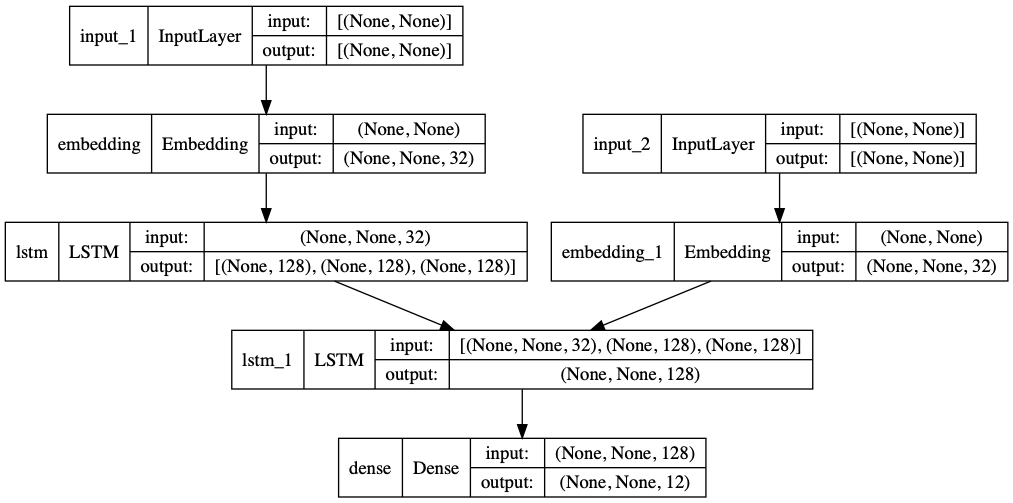

In [52]:
keras.utils.plot_model(model,
                       "../models/plot_model/Encoder-Decoder_model_4.png",
                       show_shapes=True)

In [47]:
optimizer = keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit([X_train, X_train_decoder],
                    y_train,
                    epochs=10,
                    validation_data=([X_val, X_val_decoder], y_val))

Epoch 1/10
313/313 [==============================] - 8s 14ms/step - loss: 1.6803 - accuracy: 0.3742 - val_loss: 1.4177 - val_accuracy: 0.4503
Epoch 2/10
313/313 [==============================] - 3s 11ms/step - loss: 1.1901 - accuracy: 0.5584 - val_loss: 0.8955 - val_accuracy: 0.6709
Epoch 3/10
313/313 [==============================] - 4s 12ms/step - loss: 0.6278 - accuracy: 0.7760 - val_loss: 0.3910 - val_accuracy: 0.8706
Epoch 4/10
313/313 [==============================] - 4s 11ms/step - loss: 0.2436 - accuracy: 0.9391 - val_loss: 0.1390 - val_accuracy: 0.9750
Epoch 5/10
313/313 [==============================] - 4s 11ms/step - loss: 0.0731 - accuracy: 0.9926 - val_loss: 0.0441 - val_accuracy: 0.9977
Epoch 6/10
313/313 [==============================] - 4s 12ms/step - loss: 0.0401 - accuracy: 0.9964 - val_loss: 0.0255 - val_accuracy: 0.9990
Epoch 7/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0168 - accuracy: 0.9998 - val_loss: 0.0137 - val_accuracy: 0.9999

Ëøô‰∏™Ê®°Âûã‰πüËææÂà∞‰∫Ü 100% ÁöÑÈ™åËØÅÂáÜÁ°ÆÁéáÔºå‰ΩÜÂÆÉÁöÑÈÄüÂ∫¶Êõ¥Âø´„ÄÇ

3. ‰ΩøÁî®Ê®°ÂûãËøõË°åÈ¢ÑÊµã

    Ê®°ÂûãÂú®È™åËØÅÈõÜ‰∏äËææÂà∞‰∫ÜËøë100%ÁöÑÂáÜÁ°ÆÂ∫¶ÔºÅÂú®Êé®ÁêÜËøáÁ®ã‰∏≠ÔºåÊ®°Âûã‰∏≠ÁöÑËß£Á†ÅÂô®**Â∞Ü‰ΩøÁî®ÂÖàÂâçÁöÑÈ¢ÑÊµãËøõË°åÂΩìÂâçÈ¢ÑÊµã.**
   

In [48]:
max_output_length = y_train.shape[1]  # 10


# ËØ¶Ëß£:È¢ÑÊµãÊó•ÊúüÂ≠óÁ¨¶‰∏≤ÂáΩÊï∞
def pred_date_strs(date_strs):
    X = prepare_date_strs_padded(date_strs)
    print("X\n", X, "\n", "-" * 50)

    y_pred_ids = tf.fill(dims=(len(X), 1), value=sos_id)  # ÂàùÂßã‰ΩçÁΩÆ:<sos>
    print("y:ÂàùÂßã<sos>\n", y_pred_ids, "\n", "-" * 50)
    for index in range(max_output_length):
        pad_size = max_output_length - y_pred_ids.shape[1]  # 1: 10-1
        X_decoder = tf.pad(y_pred_ids, [[0, 0], [0, pad_size]])
        print("X_decoder:Á¨¨%sËΩÆ\n" % (index + 1), X_decoder, "\n", "-" * 50)

        # ËÆ°ÁÆóÁõÆÊ†áÂ≠óÁ¨¶Ë°®ÁöÑÂ≠óÁ¨¶Ê¶ÇÁéá Âπ∂ËæìÂá∫ÊúÄÂ§ßÁöÑids
        y_probas_next = model.predict([X, X_decoder])[:, index:index + 1]
        y_pred_next = tf.argmax(y_probas_next, axis=-1, output_type=tf.int32)
        # Âæ™ÁéØÂ∞ÜÈ¢ÑÊµãÂ≠óÁ¨¶‰∏ä‰∏Ä‰∏™Â≠óÁ¨¶‰∏≤ËøõË°åÊãºÊé•
        y_pred_ids = tf.concat([y_pred_ids, y_pred_next], axis=1)

    # ÊéíÈô§<sos>
    y_pred_str = ids_to_date_strs(y_pred_ids[:, 1:], output_chars)

    return y_pred_str


pred_date_strs(["July 14, 1789", "May 19, 2022"])

X
 tf.Tensor(
[[16 36 28 38  1  4  7  2  1  4 10 11 12  0  0  0  0  0]
 [17 21 38  1  4 12  2  1  5  3  5  5  0  0  0  0  0  0]], shape=(2, 18), dtype=int32) 
 --------------------------------------------------
y:ÂàùÂßã<sos>
 tf.Tensor(
[[12]
 [12]], shape=(2, 1), dtype=int32) 
 --------------------------------------------------
X_decoder:Á¨¨1ËΩÆ
 tf.Tensor(
[[12  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0]], shape=(2, 10), dtype=int32) 
 --------------------------------------------------
X_decoder:Á¨¨2ËΩÆ
 tf.Tensor(
[[12  2  0  0  0  0  0  0  0  0]
 [12  3  0  0  0  0  0  0  0  0]], shape=(2, 10), dtype=int32) 
 --------------------------------------------------
X_decoder:Á¨¨3ËΩÆ
 tf.Tensor(
[[12  2  8  0  0  0  0  0  0  0]
 [12  3  1  0  0  0  0  0  0  0]], shape=(2, 10), dtype=int32) 
 --------------------------------------------------
X_decoder:Á¨¨4ËΩÆ
 tf.Tensor(
[[12  2  8  9  0  0  0  0  0  0]
 [12  3  1  3  0  0  0  0  0  0]], shape=(2, 10), dtype=int32) 
 ----

['1789-07-14', '2022-05-19']

### V3: ‰ΩøÁî® TF-Addons ÁöÑ seq2seq ÂÆûÁé∞ Third version: using TF-Addons's seq2seq implementation

ËÆ©Êàë‰ª¨ÊûÑÂª∫ÂÆåÂÖ®Áõ∏ÂêåÁöÑÊ®°ÂûãÔºå‰ΩÜ‰ΩøÁî® `TF-Addon` ÁöÑ `seq2seq API`„ÄÇ‰∏∫‰∫ÜÁÆÄÂçïËµ∑ËßÅÔºåÊ≤°ÊúâÊ®°ÂûãËæìÂÖ•Êù•ÊåáÂÆöËæìÂá∫Â∫èÂàóÈïøÂ∫¶Ôºà‰ΩÜÂ¶ÇÊûúÊÇ®ÁöÑÈ°πÁõÆÈúÄË¶ÅÂÆÉÔºåÂΩìËæìÂá∫Â∫èÂàóÊúâÈùûÂ∏∏‰∏çÂêåÁöÑÈïøÂ∫¶,ÊÇ®ÂèØ‰ª•ËΩªÊùæÂú∞Â∞ÜÂÖ∂Ê∑ªÂä†ÂõûÊù•Ôºâ„ÄÇ

#### TrainingSamplerÈááÊ†∑Âô®

1. ‰ΩøÁî®`tfa.seq2seq.seq2seq`ÁöÑ `TrainingSampler`ÈááÊ†∑Âô®ÁöÑÂÆûÁé∞
    - `TrainingSampler`ÈááÊ†∑Âô®:‰∏Ä‰∏™ÁÆÄÂçïÂú∞ËØªÂèñÂÖ∂ËæìÂÖ•ÁöÑËÆ≠ÁªÉÈááÊ†∑Âô®„ÄÇ


In [49]:
import tensorflow_addons as tfa

In [50]:
initialization(42)

encoder_inputs_dim = len(input_chars) + 1  # +1: id‰ªé1ÂºÄÂßã,   # 39
decoder_inputs_dim = len(output_chars) + 2  # +2: ~, <sos>  # 13
decoder_outputs_dim = len(output_chars) + 1  # +1: ~, Êó†ÈúÄÈ¢ÑÊµã<sos>  #12
embed_size = 32
units = 128

# sequence_lengths = keras.layers.Input(shape=[], dtype=np.int32)

In [51]:
# ÁºñÁ†ÅÂô®
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)  # 18
encoder_embedding_layer = keras.layers.Embedding(input_dim=encoder_inputs_dim,
                                                 output_dim=embed_size)
encoder_embeddings = encoder_embedding_layer(encoder_inputs)

encoder = keras.layers.LSTM(units, return_state=True)
encoder_output, state_h, state_c = encoder(encoder_embeddings)
encoder_state = [state_h, state_c]

# Ëß£Á†ÅÂô®
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)  # 10
decoder_embedding_layer = keras.layers.Embedding(input_dim=decoder_inputs_dim,
                                                 output_dim=embed_size)
decoder_embeddings = decoder_embedding_layer(decoder_inputs)

#############
decoder_cell = keras.layers.LSTMCell(units)
sampler = tfa.seq2seq.sampler.TrainingSampler()  # ÈááÊ†∑Âô®
output_layer = keras.layers.Dense(decoder_outputs_dim)

decoder = tfa.seq2seq.basic_decoder.BasicDecoder(decoder_cell, sampler,
                                                 output_layer)
#############

final_outputs, final_state, final_sequence_lengths = decoder(
    decoder_embeddings,
    initial_state=encoder_state,
    #     sequence_length=sequence_lengths
)

y_proba = keras.layers.Softmax()(final_outputs.rnn_output)

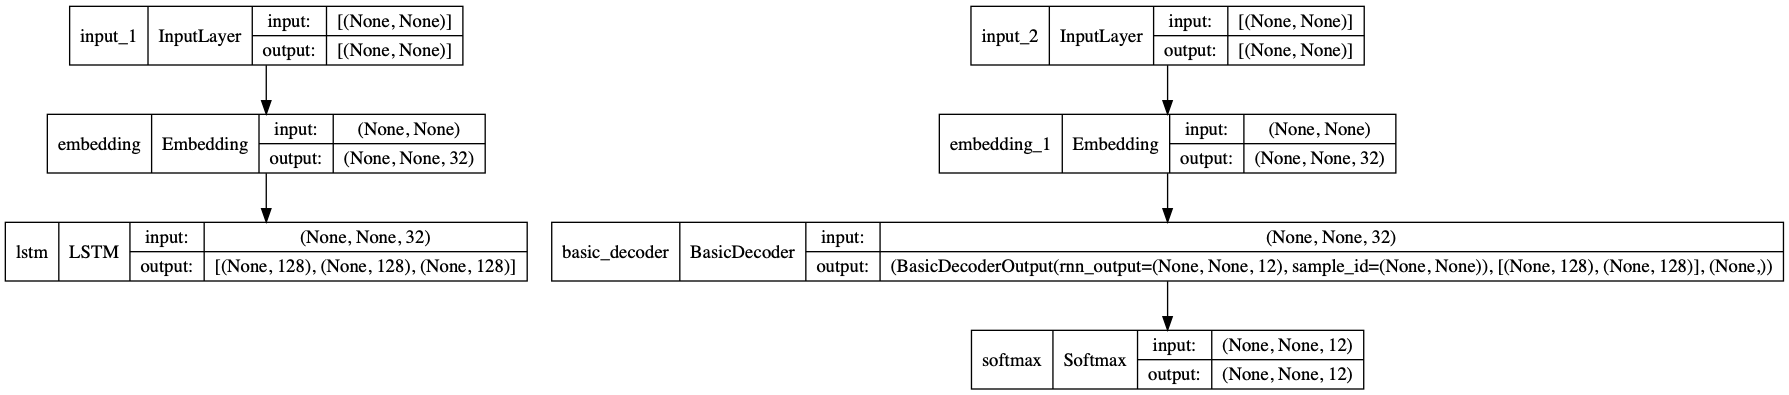

In [62]:
model = keras.Model(inputs=[encoder_inputs, decoder_inputs],
                    outputs=[y_proba])
keras.utils.plot_model(model,
                       "../models/plot_model/Encoder-Decoder_model_2.png",
                       show_shapes=True)

In [53]:
optimizer = keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit([X_train, X_train_decoder],
                    y_train,
                    epochs=15,
                    validation_data=([X_val, X_val_decoder], y_val))

Epoch 1/15
313/313 [==============================] - 20s 50ms/step - loss: 1.6803 - accuracy: 0.3742 - val_loss: 1.4238 - val_accuracy: 0.4456
Epoch 2/15
313/313 [==============================] - 17s 54ms/step - loss: 1.1932 - accuracy: 0.5572 - val_loss: 0.9097 - val_accuracy: 0.6658
Epoch 3/15
313/313 [==============================] - 15s 47ms/step - loss: 0.6397 - accuracy: 0.7712 - val_loss: 0.3555 - val_accuracy: 0.8935
Epoch 4/15
313/313 [==============================] - 17s 53ms/step - loss: 0.2113 - accuracy: 0.9499 - val_loss: 0.1152 - val_accuracy: 0.9796
Epoch 5/15
313/313 [==============================] - 16s 50ms/step - loss: 0.1017 - accuracy: 0.9824 - val_loss: 0.0536 - val_accuracy: 0.9959
Epoch 6/15
313/313 [==============================] - 15s 48ms/step - loss: 0.0332 - accuracy: 0.9989 - val_loss: 0.0248 - val_accuracy: 0.9992
Epoch 7/15
313/313 [==============================] - 18s 56ms/step - loss: 0.0177 - accuracy: 0.9996 - val_loss: 0.0147 - val_accuracy:

2. ÁºñÂÜôÂáΩÊï∞Â∞ÜIDsËΩ¨Âåñ‰∏∫Â≠óÁ¨¶‰∏≤ÂΩ¢Âºè

In [54]:
" "+input_chars

'  ,0123456789ADFJMNOSabceghilmnoprstuvy'

In [55]:
def ids_to_date_strs(ids, chars_list):
    return [
        "".join([(" " + chars_list)[index] for index in sequence])
        for sequence in ids
    ]

3. È¢ÑÂ§ÑÁêÜÂ∫èÂàó 
    
    Âº∫Âà∂ËøõË°å0Â°´ÂÖÖËá≥`length==18(max)`

In [56]:
max_input_length = X_train.shape[1]  # 18

# È¢ÑÂ§ÑÁêÜÂ∫èÂàó -> Âº∫Âà∂ËøõË°å0Â°´ÂÖÖËá≥length==18(max)
def prepare_date_strs_padded(date_strs):
    X = prepare_date_strs(date_strs, input_chars)

    if X.shape[1] < max_input_length:
        X = tf.pad(X, [
            [0,0],
            [0, max_input_length-X.shape[1]]  
        ])
    return X

4. ‰ΩøÁî®Ê®°ÂûãËøõË°åÈ¢ÑÊµã

    Ê®°ÂûãÂú®È™åËØÅÈõÜ‰∏äËææÂà∞‰∫ÜËøë100%ÁöÑÂáÜÁ°ÆÂ∫¶ÔºÅÂú®Êé®ÁêÜËøáÁ®ã‰∏≠ÔºåÊ®°Âûã‰∏≠ÁöÑËß£Á†ÅÂô®**Â∞Ü‰ΩøÁî®ÂÖàÂâçÁöÑÈ¢ÑÊµãËøõË°åÂΩìÂâçÈ¢ÑÊµã.**
   

In [57]:
max_output_length = y_train.shape[1]  # 10


# È¢ÑÊµãÊó•ÊúüÂ≠óÁ¨¶‰∏≤ÂáΩÊï∞
def pred_date_strs(date_strs):
    X = prepare_date_strs_padded(date_strs)
    y_pred_ids = tf.fill(dims=(len(X), 1), value=sos_id)  # ÂàùÂßã‰ΩçÁΩÆ:<sos>

    for index in range(max_output_length):
        pad_size = max_output_length - y_pred_ids.shape[1]  # 1: 10-1
        X_decoder = tf.pad(y_pred_ids, [[0, 0], [0, pad_size]])
        # ËÆ°ÁÆóÁõÆÊ†áÂ≠óÁ¨¶Ë°®ÁöÑÂ≠óÁ¨¶Ê¶ÇÁéá Âπ∂ËæìÂá∫ÊúÄÂ§ßÁöÑids
        y_probas_next = model.predict([X, X_decoder])[:, index:index + 1]
        y_pred_next = tf.argmax(y_probas_next, axis=-1, output_type=tf.int32)
        # Âæ™ÁéØÂ∞ÜÈ¢ÑÊµãÂ≠óÁ¨¶‰∏ä‰∏Ä‰∏™Â≠óÁ¨¶‰∏≤ËøõË°åÊãºÊé•
        y_pred_ids = tf.concat([y_pred_ids, y_pred_next], axis=1)

    # ÊéíÈô§<sos>
    y_pred_str = ids_to_date_strs(y_pred_ids[:, 1:], output_chars)

    return y_pred_str


pred_date_strs(["July 14, 1789", "May 19, 2022"])

['1789-07-14', '2022-05-19']

#### GreedyEmbeddingSamplerÈááÊ†∑Âô®

Âà∞ÁõÆÂâç‰∏∫Ê≠¢ÔºåÂú®Êé®ÁêÜËøáÁ®ã‰∏≠ÔºåÊàë‰ª¨‰∏∫ÊØè‰∏™Êñ∞Â≠óÁ¨¶ËøêË°å‰∫Ü‰∏ÄÊ¨°Ê®°Âûã.

- ‰ΩøÁî®Êõ¥ÊúâÊïàÁöÑ**Êé®ÁêÜ**ÊñπÂºè:
   - Âü∫‰∫éÂÖàÂâçËÆ≠ÁªÉÁöÑÂ±ÇÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑËß£Á†ÅÂô®Ôºå‰ΩÜ‰ΩøÁî®`GreedyEmbeddingSampler`ËÄå‰∏çÊòØ`TrainingSampler`„ÄÇ
   - Âú®ÊØè‰∏™Êó∂Èó¥Ê≠•ÈïøÔºå`GreedyEmbeddingSampler`**Â∞ÜËÆ°ÁÆóËß£Á†ÅÂô®ËæìÂá∫ÁöÑ`argmax`**ÔºåÂπ∂ÈÄöËøáËß£Á†ÅÂô®ÁöÑÂµåÂÖ•Â±ÇËøêË°åÁîüÊàêÁöÑ‰ª§Áâå`ids`„ÄÇÁÑ∂ÂêéÂÆÉÂ∞ÜÂú®‰∏ã‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÈïøÂ∞ÜÁîüÊàêÁöÑÂµåÂÖ•È¶àÈÄÅÂà∞Ëß£Á†ÅÂô®ÁöÑ `LSTM` ÂçïÂÖÉ„ÄÇËøôÊ†∑ÔºåÊàë‰ª¨**Âè™ÈúÄË¶ÅËøêË°å‰∏ÄÊ¨°Ëß£Á†ÅÂô®**Â∞±ÂèØ‰ª•ÂæóÂà∞ÂÆåÊï¥ÁöÑÈ¢ÑÊµã„ÄÇ

In [58]:
initialization(42)

encoder_inputs_dim = len(input_chars) + 1  # +1: id‰ªé1ÂºÄÂßã,   # 39
decoder_inputs_dim = len(output_chars) + 2  # +2: ~, <sos>  # 13
decoder_outputs_dim = len(output_chars) + 1  # +1: ~, Êó†ÈúÄÈ¢ÑÊµã<sos>  #12
embed_size = 32
units = 128

- Âá†ÁÇπÊ≥®ÊÑè‰∫ãÈ°πÔºö
    1. `GreedyEmbeddingSampler` ÈúÄË¶Å
        - `start_token`:ÂåÖÂê´ÊØè‰∏™Ëß£Á†ÅÂô®Â∫èÂàóÁöÑ `start-of-sequence` ID ÁöÑÂêëÈáè.
        - `end_token`:‰∏ÄÊó¶Ê®°ÂûãËæìÂá∫Ê≠§`token`ÔºåËß£Á†ÅÂô®Â∞ÜÂÅúÊ≠¢Ëß£Á†ÅÂ∫èÂàó.
    2. Êàë‰ª¨ÂøÖÈ°ªÂú®ÂàõÂª∫`BasicDecoder`Êó∂ËÆæÁΩÆ`maximum_iterations`ÔºåÂê¶ÂàôÂÆÉÂèØËÉΩ‰ºöÈô∑ÂÖ•Êó†ÈôêÂæ™ÁéØÔºàÂ¶ÇÊûúÊ®°Âûã‰ªéÊú™‰∏∫Ëá≥Â∞ë‰∏Ä‰∏™Â∫èÂàóËæìÂá∫ÁªìÊùüÊ†áËÆ∞Ôºâ„ÄÇËøôÂ∞ÜËø´‰ΩøÊÇ®ÈáçÊñ∞ÂêØÂä® Jupyter ÂÜÖÊ†∏„ÄÇ
    3. **‰∏çÂÜçÈúÄË¶ÅËß£Á†ÅÂô®ËæìÂÖ•ÔºåÂõ†‰∏∫ÊâÄÊúâËß£Á†ÅÂô®ËæìÂÖ•ÈÉΩÊòØÊ†πÊçÆÂâç‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑËæìÂá∫Âä®ÊÄÅÁîüÊàêÁöÑ**„ÄÇ
    4. Ê®°ÂûãÁöÑËæìÂá∫ÊòØ `final_outputs.sample_id`ÔºåËÄå‰∏çÊòØ `final_outputs.rnn_outputs` ÁöÑ `softmax`„ÄÇËøô‰ΩøÊàë‰ª¨ÂèØ‰ª•Áõ¥Êé•Ëé∑ÂæóÊ®°ÂûãËæìÂá∫ÁöÑ `argmax`„ÄÇ
        - Â¶ÇÊûúÊÇ®Êõ¥ÂñúÊ¨¢ËÆøÈóÆ `logits`ÔºåÊÇ®ÂèØ‰ª•Â∞Ü `final_outputs.sample_id` ÊõøÊç¢‰∏∫ `final_outputs.rnn_outputs`„ÄÇ

In [59]:
max_output_length = y_train.shape[1]  # 10

# Ëß£Á†ÅÂô®
# !!Êé®ÁêÜÈò∂ÊÆµ‰∏çÂÜçÈúÄË¶ÅËß£Á†ÅÂô®ËæìÂÖ•!!
# decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)  # 10
# decoder_embedding_layer = keras.layers.Embedding(input_dim=decoder_inputs_dim,
#                                                  output_dim=embed_size)
# decoder_embeddings = decoder_embedding_layer(decoder_inputs)

##############
# decoder_cell = keras.layers.LSTMCell(units)
# Ë¥™Â©™ÈááÊ†∑Âô®:‰ªéËæìÂá∫ÂàÜÂ∏É‰∏≠Ëé∑ÂèñÊúÄÂ§ßÂÄºÁöÑÊé®ÁêÜÈááÊ†∑Âô®
inference_sampler = tfa.seq2seq.sampler.GreedyEmbeddingSampler(
    embedding_fn=decoder_embedding_layer)
# output_layer = keras.layers.Dense(decoder_outputs_dim)

inference_decoder = tfa.seq2seq.basic_decoder.BasicDecoder(
    cell=decoder_cell,          # Ê≥®ÊÑè!!
    sampler=inference_sampler,  # ‰ΩøÁî®Ë¥™Â©™ÈááÊ†∑Âô®
    output_layer=output_layer,  # Ê≥®ÊÑè!!
    maximum_iterations=max_output_length  # ÊúÄÂ§ßËø≠‰ª£Ê¨°Êï∞ÔºàÂèØ‰ª•ÁêÜËß£‰∏∫decoderÊúÄÂ§öÂèØ‰ª•ÁîüÊàêÂá†‰∏™ËØçÔºâ
)
#############

In [60]:
batch_size = tf.shape(encoder_inputs)[:1]
start_tokens = tf.fill(dims=batch_size, value=sos_id)  
# Âèñstart-of-sequence -> <sos>

In [61]:
final_outputs, final_state, final_sequence_lengths = inference_decoder(
    start_tokens,  # decoder_cell 
    initial_state=encoder_state,
    start_tokens=start_tokens,
    end_token=0)

In [62]:
inference_model = keras.models.Model(inputs=[encoder_inputs],
                                     outputs=[final_outputs.sample_id])

- Áé∞Âú®Êàë‰ª¨ÂèØ‰ª•ÁºñÂÜô‰∏Ä‰∏™ÁÆÄÂçïÁöÑÂáΩÊï∞Ôºå‰ΩøÁî®ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÊù•ÊâßË°åÊó•ÊúüÊ†ºÂºèËΩ¨Êç¢

In [63]:
# È¢ÑÊµãÊó•ÊúüÂ≠óÁ¨¶‰∏≤ÂáΩÊï∞  --> ‰ΩøÁî®Ë¥™Â©™ÈááÊ†∑Âô®ÁöÑÊé®ÁêÜÊ®°Âûã
def fast_pred_date_strs(date_strs):
    X = prepare_date_strs_padded(date_strs)
    y_pred_ids = inference_model.predict(X)
    y_pred_str = ids_to_date_strs(y_pred_ids, output_chars)

    return y_pred_str


fast_pred_date_strs(["July 14, 1789", "May 19, 2022"])

['1789-07-14', '2022-05-19']

- ÊØîËæÉËøêË°åÊó∂Èó¥

    ËøôÊòØË∂ÖËøá 10 ÂÄçÁöÑÂä†ÈÄüÔºÅÂ¶ÇÊûúÊàë‰ª¨Â§ÑÁêÜÊõ¥ÈïøÁöÑÂ∫èÂàóÔºåÂä†ÈÄü‰ºöÊõ¥Â§ö!

In [64]:
%timeit pred_date_strs(["July 14, 1789", "May 19, 2022"])

604 ms ¬± 81.6 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [65]:
%timeit fast_pred_date_strs(["July 14, 1789", "May 19, 2022"])

69.1 ms ¬± 15.9 ms per loop (mean ¬± std. dev. of 7 runs, 10 loops each)


### V4: ‰ΩøÁî® TF-Addons ÁöÑseq2seq ÂÆûÁé∞Ë∞ÉÂ∫¶ÈááÊ†∑Âô® Fourth versions: using TF-Addons's seq2seq implementions with a scheduled sampler

#### ScheduledEmbeddingTrainingSamplerÈááÊ†∑Âô®

ÂΩìÊàë‰ª¨`ËÆ≠ÁªÉÈò∂ÊÆµ`Ââç‰∏Ä‰∏™Ê®°ÂûãÊó∂ÔºåÂú®ÊØè‰∏™Êó∂Èó¥Ê≠•Èïø $t$ Êàë‰ª¨ÁªôÊ®°Âûã‰∏Ä‰∏™Êó∂Èó¥Ê≠•Èïø $t-1$ÁöÑÁõÆÊ†áÊ†áËÆ∞„ÄÇÁÑ∂ËÄåÔºåÂú®`Êé®ÁêÜÈò∂ÊÆµ`Êó∂ÔºåÊ®°ÂûãÂú®ÊØè‰∏™Êó∂Èó¥Ê≠•ÈÉΩÊ≤°ÊúâÂæóÂà∞Ââç‰∏Ä‰∏™ÁõÆÊ†á„ÄÇÁõ∏ÂèçÔºåÂÆÉÂæóÂà∞‰∫Ü**Ââç‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÈïøÁöÑÈ¢ÑÊµã**„ÄÇ

ÊâÄ‰ª•ËÆ≠ÁªÉÂíåÊé®ÁêÜ‰πãÈó¥Â≠òÂú®Â∑ÆÂºÇÔºåËøôÂèØËÉΩ‰ºöÂØºËá¥‰ª§‰∫∫Â§±ÊúõÁöÑË°®Áé∞„ÄÇ

‰∏∫‰∫ÜÁºìËß£ËøôÁßçÊÉÖÂÜµÔºå**Êàë‰ª¨ÂèØ‰ª•Âú®ËÆ≠ÁªÉÊúüÈó¥ÈÄêÊ∏êÁî®È¢ÑÊµãÊõøÊç¢ÁõÆÊ†á**„ÄÇ‰∏∫Ê≠§ÔºåÊàë‰ª¨Âè™ÈúÄÂ∞Ü `TrainingSampler` ÊõøÊç¢‰∏∫ `ScheduledEmbeddingTrainingSampler`ÔºåÂπ∂‰ΩøÁî® `Keras` ÂõûË∞ÉÈÄêÊ∏êÂ¢ûÂä†`sampling_probability`,Âç≥Ëß£Á†ÅÂô®Â∞Ü‰ΩøÁî®‰∏ä‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑÈ¢ÑÊµãËÄå‰∏çÊòØ‰∏ä‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑÁõÆÊ†á„ÄÇ

`ScheduledEmbeddingTrainingSampler`: Â∞ÜÂú®ÁõÆÊ†áÊàñÂÆûÈôÖËæìÂá∫‰ΩøÁî®‰∏Ä‰∏™Ê¶ÇÁéáÂÄºÂÅöÈöèÊú∫ÈÄâÊã©ÔºåÊÇ®ÂèØ‰ª•Âú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÈÄêÊ∏êÊîπÂèòÁöÑÊ¶ÇÁéá„ÄÇ

1. Ë∞ÉÂ∫¶ÁöÑÂµåÂÖ•ËÆ≠ÁªÉÈááÊ†∑Âô®ÁöÑÂÆûÁé∞
   - `ScheduledEmbeddingTrainingSampler`: Â∞ÜÂú®ÁõÆÊ†áÊàñÂÆûÈôÖËæìÂá∫‰ΩøÁî®‰∏Ä‰∏™Ê¶ÇÁéáÂÄºÂÅöÈöèÊú∫ÈÄâÊã©ÔºåÊÇ®ÂèØ‰ª•Âú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÈÄêÊ∏êÊîπÂèòÁöÑÊ¶ÇÁéá„ÄÇ


In [66]:
initialization(42)

encoder_inputs_dim = len(input_chars) + 1  # +1: id‰ªé1ÂºÄÂßã,   # 39
decoder_inputs_dim = len(output_chars) + 2  # +2: ~, <sos>  # 13
decoder_outputs_dim = len(output_chars) + 1  # +1: ~, Êó†ÈúÄÈ¢ÑÊµã<sos>  #12
embed_size = 32
units = 128
n_epochs = 20

# sequence_lengths = keras.layers.Input(shape=[], dtype=np.int32)

In [67]:
# ÁºñÁ†ÅÂô®
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)  # 18
encoder_embedding_layer = keras.layers.Embedding(input_dim=encoder_inputs_dim,
                                                 output_dim=embed_size)
encoder_embeddings = encoder_embedding_layer(encoder_inputs)

encoder = keras.layers.LSTM(units, return_state=True)
encoder_output, state_h, state_c = encoder(encoder_embeddings)
encoder_state = [state_h, state_c]

# Ëß£Á†ÅÂô®
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)  # 10
decoder_embedding_layer = keras.layers.Embedding(input_dim=decoder_inputs_dim,
                                                 output_dim=embed_size)
decoder_embeddings = decoder_embedding_layer(decoder_inputs)

#############
decoder_cell = keras.layers.LSTMCell(units)
# Ë¶ÅÂú®ËÆ≠ÁªÉÊúüÈó¥Êõ¥ÊîπÈááÊ†∑Ê¶ÇÁéáÔºåÊúÄÁÆÄÂçïÁöÑÈÄâÊã©ÊòØÂ∞ÜÂÖ∂ËÆæ‰∏∫ `tf.Variable`
sampling_probability = tf.Variable(0.)
sampler = tfa.seq2seq.sampler.ScheduledEmbeddingTrainingSampler(  # ÈááÊ†∑Âô®
    sampling_probability=sampling_probability,
    embedding_fn=decoder_embedding_layer)
output_layer = keras.layers.Dense(decoder_outputs_dim)

decoder = tfa.seq2seq.basic_decoder.BasicDecoder(decoder_cell, sampler,
                                                 output_layer)
#############

final_outputs, final_state, final_sequence_lengths = decoder(
    decoder_embeddings,
    initial_state=encoder_state,
    #     sequence_length=sequence_lengths
)

y_proba = keras.layers.Softmax()(final_outputs.rnn_output)

In [68]:
model = keras.Model(inputs=[encoder_inputs, decoder_inputs],
                    outputs=[y_proba])

2. ‰ΩøÁî® `Keras` ÂõûË∞ÉÂáΩÊï∞ÈÄêÊ∏êÂ¢ûÂä†`sampling_probability`

In [69]:
def update_sampling_probability(epoch, logs):
    proba = min(1.0, epoch/(n_epochs-10))
    sampler.sampling_probability.assign(proba)

In [70]:
sampling_probability_cb = keras.callbacks.LambdaCallback(
    on_epoch_begin=update_sampling_probability)

3. ËÆ≠ÁªÉÊ®°Âûã

In [71]:
optimizer = keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit([X_train, X_train_decoder],
                    y_train,
                    epochs=n_epochs,
                    validation_data=([X_val, X_val_decoder], y_val),
                    callbacks=[sampling_probability_cb])

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/basic_decoder/decoder/while/gradients/model/basic_decoder/decoder/while/cond_1_grad/Identity_4:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/basic_decoder/decoder/while/gradients/model/basic_decoder/decoder/while/cond_1_grad/Identity_3:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/model/basic_decoder/decoder/while/gradients/model/basic_decoder/decoder/while/cond_1_grad/Identity_5:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/basic_decoder/decoder/whil

313/313 [==============================] - 28s 75ms/step - loss: 1.6803 - accuracy: 0.3742 - val_loss: 1.4227 - val_accuracy: 0.4459
Epoch 2/20
313/313 [==============================] - 26s 83ms/step - loss: 1.2175 - accuracy: 0.5501 - val_loss: 0.9474 - val_accuracy: 0.6513
Epoch 3/20
313/313 [==============================] - 26s 83ms/step - loss: 0.7474 - accuracy: 0.7239 - val_loss: 0.5695 - val_accuracy: 0.7905
Epoch 4/20
313/313 [==============================] - 22s 71ms/step - loss: 0.4340 - accuracy: 0.8540 - val_loss: 0.3025 - val_accuracy: 0.9110
Epoch 5/20
313/313 [==============================] - 26s 83ms/step - loss: 0.2397 - accuracy: 0.9331 - val_loss: 0.1893 - val_accuracy: 0.9524
Epoch 6/20
313/313 [==============================] - 27s 86ms/step - loss: 0.1465 - accuracy: 0.9646 - val_loss: 0.1131 - val_accuracy: 0.9729
Epoch 7/20
313/313 [==============================] - 22s 71ms/step - loss: 0.1548 - accuracy: 0.9651 - val_loss: 0.0769 - val_accuracy: 0.9838
Epo

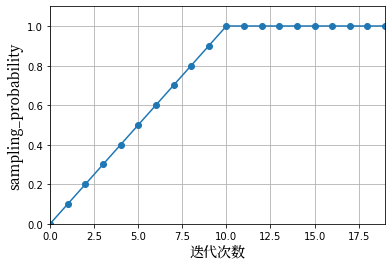

In [72]:
plt.plot(history.epoch, [min(1.0, epoch/(n_epochs-10)) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 1.1])
plt.xlabel("Ëø≠‰ª£Ê¨°Êï∞", font_properties=my_font)
plt.ylabel("sampling_probability", font_properties=my_font)
plt.grid(True)
plt.show()

#### SampleEmbeddingSamplerÈááÊ†∑Âô®

   ÂØπ‰∫éÊé®ÁêÜÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî®` GreedyEmbeddingSamplerÈááÊ†∑Âô®`ÂÅö‰∏é‰πãÂâçÂÆåÂÖ®Áõ∏ÂêåÁöÑ‰∫ãÊÉÖ„ÄÇ‰ΩÜÊòØÔºå‰∏∫‰∫ÜÂÆåÊï¥Ëµ∑ËßÅÔºåËÆ©Êàë‰ª¨ÊîπÁî® `SampleEmbeddingSamplerÈááÊ†∑Âô®`„ÄÇ
    
   ËøôÂá†‰πéÊòØ‰∏ÄÊ†∑ÁöÑÔºåÂè™ÊòØÂÆÉ‰∏çÊòØ‰ΩøÁî®Ê®°ÂûãËæìÂá∫ÁöÑ `argmax` Êù•Êü•Êâæ‰ª§Áâå IDÔºåËÄåÊòØ**Â∞ÜËæìÂá∫ËßÜ‰∏∫ `logits`ÔºåÂπ∂‰ΩøÁî®ÈöèÊú∫ÈááÊ†∑ÁöÑ‰ª§Áâå ID**„ÄÇ
    
   ÂèÇÊï∞`softmax_temperature`: ÂèÇÊï∞ÂÄºË∂äÈ´ò, ÁîüÊàêÁöÑÊñáÊú¨Ë∂äÈöèÊú∫. Âú®ËÆ°ÁÆó `softmax` ‰πãÂâçÈô§‰ª• `logits` ÁöÑÂÄº„ÄÇËæÉÂ§ßÁöÑÂÄºÔºàÈ´ò‰∫é 1.0Ôºâ‰ºö‰∫ßÁîüÊõ¥Â§öÁöÑÈöèÊú∫Ê†∑Êú¨ÔºåËÄåËæÉÂ∞èÁöÑÂÄº‰ºöÂ∞ÜÈááÊ†∑ÂàÜÂ∏ÉÊé®Âêë `argmax`„ÄÇÂøÖÈ°ª‰∏•Ê†ºÂ§ß‰∫é 0„ÄÇÈªòËÆ§‰∏∫ 1.0„ÄÇ

In [73]:
max_output_length = y_train.shape[1]  # 10
softmax_temperature = tf.Variable(1.)

# Ëß£Á†ÅÂô®
inference_sampler = tfa.seq2seq.SampleEmbeddingSampler(
    embedding_fn=decoder_embedding_layer,
    softmax_temperature=softmax_temperature)

inference_decoder = tfa.seq2seq.basic_decoder.BasicDecoder(
    cell=decoder_cell,
    sampler=inference_sampler,
    output_layer=output_layer,
    maximum_iterations=max_output_length
)

In [74]:
batch_size = tf.shape(encoder_inputs)[:1]
start_tokens = tf.fill(dims=batch_size, value=sos_id)

final_outputs, final_state, final_sequence_lengths = inference_decoder(
    start_tokens,
    initial_state=encoder_state,
    start_tokens=start_tokens,
    end_token=0,
)

inference_model = keras.models.Model(inputs=[encoder_inputs],
                                     outputs=[final_outputs.sample_id])

In [75]:
def creative_predict_date_strs(date_strs, temperature=1.0):
    softmax_temperature.assign(temperature)
    X = prepare_date_strs_padded(date_strs)
    y_pred_ids = inference_model.predict(X)
    y_pred_str = ids_to_date_strs(y_pred_ids, output_chars)
    return y_pred_str

In [76]:
creative_predict_date_strs(["July 14, 1789", "May 19, 2022"])

['1789-07-14', '2022-05-19']

In [77]:
creative_predict_date_strs(["July 14, 1789", "May 19, 2022"],
                           temperature=5.)

['8189-42-28', '8002-06-11']

## ÂèåÂêëRNN Bidirectional RNNs

Âú®Êúâ‰∫õ‰ªªÂä°‰∏≠Ôºå‰∏Ä‰∏™Êó∂ÂàªÁöÑËæìÂá∫‰∏ç‰ΩÜÂíåËøáÂéªÊó∂ÂàªÁöÑ‰ø°ÊÅØÊúâÂÖ≥Ôºå**‰πüÂíåÂêéÁª≠Êó∂ÂàªÁöÑ‰ø°ÊÅØÊúâÂÖ≥**„ÄÇÊØîÂ¶ÇÁªôÂÆö‰∏Ä‰∏™Âè•Â≠êÔºåÂÖ∂‰∏≠‰∏Ä‰∏™ËØçÁöÑËØçÊÄßÁî±ÂÆÉÁöÑ‰∏ä‰∏ãÊñáÂÜ≥ÂÆöÔºåÂç≥ÂåÖÂê´Â∑¶Âè≥‰∏§ËæπÁöÑ‰ø°ÊÅØ„ÄÇÂõ†Ê≠§ÔºåÂú®Ëøô‰∫õ‰ªªÂä°‰∏≠ÔºåÊàë‰ª¨ÂèØ‰ª•**Â¢ûÂä†‰∏Ä‰∏™ÊåâÁÖßÊó∂Èó¥ÁöÑÈÄÜÂ∫èÊù•‰º†ÈÄí‰ø°ÊÅØÁöÑÁΩëÁªúÂ±ÇÔºåÊù•Â¢ûÂº∫ÁΩëÁªúÁöÑËÉΩÂäõ.**

`ÂèåÂêëÂæ™ÁéØÁ•ûÁªèÁΩëÁªúBi-RNN`Áî±‰∏§Â±ÇÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÁªÑÊàêÔºåÂÆÉ‰ª¨ÁöÑËæìÂÖ•Áõ∏ÂêåÔºåÂè™ÊòØ‰ø°ÊÅØ‰º†ÈÄíÁöÑÊñπÂêë‰∏çÂêå.
   <img src="../images/other/16-7.png" width="400">

- ‰ΩøÁî®`keras`ÁöÑ`Bidirectional`Â±ÇÂÆûÁé∞`ÂèåÂêëRNN`

    ËØ¶ÊÉÖ:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

    - ÂèÇÊï∞`layer`: ÂÆÉÈúÄË¶Å‰∏Ä‰∏™Âæ™ÁéØÂ±ÇÔºàÁ¨¨‰∏Ä‰∏™ LSTM Â±ÇÔºâ‰Ωú‰∏∫ÂèÇÊï∞
    - ÂèÇÊï∞`merge_mode`: ÊåáÂÆöÂêàÂπ∂Ê®°ÂºèÔºåËØ•Ê®°ÂºèÊèèËø∞‰∫ÜÂú®‰º†ÈÄíÂà∞‰∏ã‰∏ÄÂ±Ç‰πãÂâçÂ∫îËØ•Â¶Ç‰ΩïÂêàÂπ∂ÂâçÂêëÂíåÂêéÂêëËæìÂá∫„ÄÇÈÄâÈ°πÂåÖÊã¨Ôºö
        - `sum`ÔºöÁªìÊûúÁõ∏Âä†
        - `mul`ÔºöÁªìÊûúÁõ∏‰πò
        - `concat`ÔºàÈªòËÆ§ÂÄºÔºâÔºöÂ∞ÜÁªìÊûúËøûÊé•Âú®‰∏ÄËµ∑Ôºå‰∏∫‰∏ã‰∏ÄÂ±ÇÊèê‰æõÂèåÂÄçÁöÑËæìÂá∫Êï∞Èáè„ÄÇ
        - `ave`ÔºöÂèñÁªìÊûúÁöÑÂπ≥ÂùáÂÄº„ÄÇ

    - `Bidirectional`Â±Ç‰ºöÂàõÂª∫Âæ™ÁéØÂ±Ç(Â¶Ç`GRU`)ÁöÑÂâØÊú¨,‰ΩÜÊñπÂêëÁõ∏Âèç, ÂÆÉÂ∞ÜËøêË°å2‰∏™Âπ∂ÂêàÂπ∂ÂÆÉ‰ª¨ÁöÑËæìÂá∫.Âõ†Ê≠§Â∞ΩÁÆ°`GRU`Â±ÇÊúâ10‰∏™ÂçïÂÖÉ, ‰ΩÜÊòØ`Bidirectional`Â±Ç‰ºöÂú®ÊØè‰∏™Êó∂Èó¥Ê≠•ÈïøËøîÂõû20‰∏™ÂÄº.

In [78]:
model = keras.models.Sequential([
    keras.layers.GRU(10, return_sequences=True, input_shape=[None, 10]),
    keras.layers.Bidirectional(keras.layers.GRU(10, return_sequences=True))
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 10)          660       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 20)          1320      
Total params: 1,980
Trainable params: 1,980
Non-trainable params: 0
_________________________________________________________________


### Bi-LSTM

`ÂèåÂêë LSTM` Êàñ `Bi-LSTM` ÊòØ‰∏ÄÁßçÂ∫èÂàóÂ§ÑÁêÜÊ®°ÂûãÔºåÁî±‰∏§‰∏™ `LSTM` ÁªÑÊàêÔºö‰∏Ä‰∏™Âú®Ê≠£ÂêëËæìÂÖ•ÔºåÂè¶‰∏Ä‰∏™Âú®ÂèçÂêëËæìÂÖ•„ÄÇ `Bi-LSTM` ÊúâÊïàÂú∞Â¢ûÂä†‰∫ÜÁΩëÁªúÂèØÁî®ÁöÑ‰ø°ÊÅØÈáèÔºåÊîπÂñÑ‰∫ÜÁÆóÊ≥ïÂèØÁî®ÁöÑ‰∏ä‰∏ãÊñá.

In [79]:
embedding_dim = 20
vocab_size = 87007

initialization(42)

bi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vocab_size, output_dim=embedding_dim, name='embed-layer'
    ),  # Output Shape ==> (None_batch_size, None_each_input_length, output_dim=20)
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, name='lstm-layer'),
        name='bidir-lstm',  # ÈªòËÆ§ÁöÑmerge_mode='concat' ==> (64)==>(128) 
    ),  # Output Shape ==> (None_batch_size, output_dim=128) 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bi_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed-layer (Embedding)      (None, None, 20)          1740140   
_________________________________________________________________
bidir-lstm (Bidirectional)   (None, 128)               43520     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,791,981
Trainable params: 1,791,981
Non-trainable params: 0
_________________________________________________________________


## ÊùüÊêúÁ¥¢ Beam Search

### Ë¥™ÂøÉÊêúÁ¥¢ÂíåÁ©∑‰∏æÊêúÁ¥¢ Greedy Search and Exhaustive Search

- **Ë¥™ÂøÉÊêúÁ¥¢**
    
    ÂØπËæìÂá∫Â∫èÂàóÁöÑÊØè‰∏ÄÊó∂Èó¥Ê≠•$t'$, Âü∫‰∫é`Ë¥™ÂøÉÊêúÁ¥¢`ÊâæÂà∞ÂÖ∑Êúâ**ÊúÄÈ´òÊù°‰ª∂Ê¶ÇÁéáÁöÑËØçÂÖÉ**:
    $$\hat{x}_{t}=\underset{x \in \mathcal{V}}{\arg \max } p_{\theta}\left(x \mid \hat{\boldsymbol{x}}_{1:(t-1)}\right)$$
    ‰∏ÄÊó¶ËæìÂá∫Â∫èÂàóÂåÖÂê´‰∫Ü`<eos>`ÊàñËÄÖËææÂà∞ÂÖ∂ÊúÄÂ§ßÈïøÂ∫¶ÔºåÂàôËæìÂá∫ÂÆåÊàê„ÄÇ
   <img src="../images/other/16-8.svg" width="200">
   
    ËøôÁßçË¥™Â©™ÂºèÁöÑÊêúÁ¥¢ÊñπÂºèÊòØÊ¨°‰ºòÁöÑ, ÁîüÊàêÁöÑÂ∫èÂàó $\hat{x}_{1: T}$ Âπ∂‰∏ç‰øùËØÅÊòØÂÖ®Â±ÄÊúÄ‰ºòÁöÑ.
$$
\prod_{t=1}^{T} \max _{x_{t} \in V} p_{\theta}\left(x_{t} \mid \hat{x}_{1:(t-1)}\right) \leq \max _{x_{1: T} \in V^{r}} \prod_{t=1}^{T} p_{\theta}\left(x \mid \boldsymbol{x}_{1:(t-1)}\right) .
$$
    <img src="../images/other/16-9.svg" width="200">

- **Á©∑‰∏æÊêúÁ¥¢**
    
    Á©∑‰∏æÊêúÁ¥¢ÊòØÁ©∑‰∏æÂú∞Âàó‰∏æ**ÊâÄÊúâÂèØËÉΩÁöÑËæìÂá∫Â∫èÂàóÂèäÂÖ∂Êù°‰ª∂Ê¶ÇÁéá**Ôºå ÁÑ∂ÂêéËÆ°ÁÆóËæìÂá∫Êù°‰ª∂Ê¶ÇÁéáÊúÄÈ´òÁöÑ‰∏Ä‰∏™„ÄÇÁ©∑‰∏æÊêúÁ¥¢ÊâÄÈÄâÂèñÂ∫èÂàóÁöÑÁ≤æÂ∫¶ÊúÄÈ´òÔºå‰ΩÜËÆ°ÁÆóÈáèÊúÄÂ§ß„ÄÇ

### ÊùüÊêúÁ¥¢ beam search

‰∏ÄÁßçÂ∏∏Áî®ÁöÑÂáèÂ∞ëÊêúÁ¥¢ÈîôËØØÁöÑÂêØÂèëÂºèÊñπÊ≥ïÊòØ`ÊùüÊêúÁ¥¢`:**Âú®ÊØè‰∏ÄÊ≠•‰∏≠ÔºåÁîüÊàê$K$‰∏™ÊúÄÂèØËÉΩÁöÑÂâçÁºÄÂ∫èÂàó**ÔºåÂÖ∂‰∏≠$K$‰∏∫ÊùüÁöÑÂ§ßÂ∞è`Beam Size`.
<img src="../images/other/16-10.png" width="300">

ÊùüÊêúÁ¥¢ÁöÑËøáÁ®ãÂ¶Ç‰∏ãÔºöÂú®Á¨¨1Ê≠•Êó∂ÔºåÁîüÊàê$K$‰∏™ÊúÄÂèØËÉΩÁöÑËØçÔºöÂú®ÂêéÈù¢ÊØè‰∏ÄÊ≠•‰∏≠Ôºå‰ªé$K|v|$‰∏™ÂÄôÈÄâËæìÂá∫‰∏≠ÈÄâÊã©$K$‰∏™ÊúÄÂèØËÉΩÁöÑÂ∫èÂàó„ÄÇ

ÊùüÁöÑÂ§ßÂ∞è$K$Ë∂äÂ§ßÔºåÊùüÊêúÁ¥¢ÁöÑÂ§çÊùÇÂ∫¶Ë∂äÈ´òÔºå‰ΩÜË∂äÊúâÂèØËÉΩÁîüÊàêÊúÄ‰ºòÂ∫èÂàóÔºåÂú®ÂÆûÈôÖÂ∫îÁî®‰∏≠ÔºåÊùüÊêúÁ¥¢ÂèØ‰ª•ÈÄöËøáË∞ÉÊï¥ÊùüÂ§ßÂ∞è$K$Êù•Âπ≥Ë°°ËÆ°ÁÆóÂ§çÊùÇÂ∫¶ÂíåÊêúÁ¥¢Ë¥®Èáè‰πãÈó¥ÁöÑ‰ºòÂÖàÁ∫ß„ÄÇ

ÊùüÊêúÁ¥¢ÈÄöËøáÁÅµÊ¥ªÈÄâÊã©ÊùüÂÆΩÔºåÂú®Ê≠£Á°ÆÁéáÂíåËÆ°ÁÆó‰ª£‰ª∑‰πãÈó¥ËøõË°åÊùÉË°°„ÄÇ

- ‰ΩøÁî®`TensorFlow-Addons`ÂÆûÁé∞ÊùüÊêúÁ¥¢:
    - È¶ñÂÖàÂàõÂª∫‰∏Ä‰∏™`BeamSearchDecoder`,Â∞ÜÊâÄÊúâËß£Á†ÅÂô®ÁöÑÂâØÊú¨ÂåÖË£ÖËµ∑Êù•
    - ‰∏∫ÊØè‰∏™Ëß£Á†ÅÂô®ÂâØÊú¨ÂàõÂª∫‰∏Ä‰∏™Ëß£Á†ÅÂô®ÁöÑÊúÄÁªàÁä∂ÊÄÅÂâØÊú¨, Âπ∂Â∞ÜËøô‰∫õÁä∂ÊÄÅËøûÂêåÂºÄÂßã‰ª§ÁâåÂíåÁªìÊùü‰ª§Áâå‰∏ÄËµ∑‰º†ÈÄíÁªôËß£Á†ÅÂô®„ÄÇ

In [80]:
beam_width = 10

# Ëß£Á†ÅÂô®
BeamSearch_decoder = tfa.seq2seq.beam_search_decoder.BeamSearchDecoder(
    cell=decoder_cell, beam_width=beam_width, output_layer=output_layer)

# tile_batch: ÂØπtensorÂ§çÂà∂
decoder_init_state = tfa.seq2seq.beam_search_decoder.tile_batch(
    encoder_state, multiplier=beam_width)

In [81]:
# outputs, _, _ = BeamSearch_decoder(encoder_embeddings,
#                                    start_tokens=start_tokens,
#                                    end_token=0,
#                                    initial_state=decoder_init_state)

> Apotosome 05/01/22

# Ê≥®ÊÑèÂäõÊú∫Âà∂ Attention Mechanisms

## Á¨îËÆ∞

<img src="../images/other/16-12.jpg">
<img src="../images/other/16-13.jpg">
<img src="../images/other/16-14.jpg">
<img src="../images/other/16-15.jpg">
<img src="../images/other/16-16.jpg">
<img src="../images/other/16-17.jpg">

---
- **Âü∫‰∫éÊ≥®ÊÑèÂäõÁöÑÂ∫èÂàóÂà∞Â∫èÂàóÊ®°Âûã**
    <img src="../images/other/16-19.png" width="400">

    Âú®Âü∫Êú¨ÁöÑ`Encoder-Decoder`Ê®°Âûã‰∏≠ÔºåÊ≥®ÊÑèÂäõÊú∫Âà∂Âú®`Encoder`Âíå`Decoder`Âä†ÂÖ•‰∫Ü‰∏ä‰∏ãÊñáÂêëÈáè`context vector`ÔºåÂ¶Ç‰∏äÂõæÊâÄÁ§∫ÔºåÂ∑¶ËæπËìùËâ≤ÁöÑ‰ª£Ë°®`Encoder`ÔºåÁ∫¢Ëâ≤ÁöÑ‰ª£Ë°®`Decoder`„ÄÇ

    ÂØπ‰∫é`Decoder`‰∏≠ÊØè‰∏™Ë¶ÅÁîüÊàêÁöÑ$y$ÔºåÈÉΩ‰ºöÁîüÊàê‰∏Ä‰∏™‰∏ä‰∏ãÊñáÂêëÈáè„ÄÇËøô‰∏™‰∏ä‰∏ãÊñáÂêëÈáèÊòØÁî±ÊØè‰∏™ËæìÂÖ•ÁöÑ`words`ÁöÑ‰ø°ÊÅØÂä†ÊùÉÊ±ÇÂíåÂæóÂà∞ÁöÑÔºåÂÖ∂‰∏≠ÊùÉÈáçÂêëÈáèÂ∞±ÊòØ**Ê≥®ÊÑèÂäõÂêëÈáè**ÔºåÂÆÉ‰ª£Ë°®Âú®Ê≠§ÂàªÁîüÊàê$y$Êó∂ËæìÂÖ•ÁöÑÂçïËØçÁöÑÈáçË¶ÅÁ®ãÂ∫¶„ÄÇÊúÄÂêéÂ∞Ü‰∏ä‰∏ãÊñáÂêëÈáèÂíåÊ≠§ÂàªÁöÑ$y$ÁöÑ‰ø°ÊÅØËøõË°åËûçÂêà‰Ωú‰∏∫ËæìÂá∫„ÄÇ

    ÊûÑÂª∫‰∏ä‰∏ãÊñáÂêëÈáèËøáÁ®ã‰πüÂæàÁÆÄÂçïÔºåÈ¶ñÂÖàÂØπ‰∫é‰∏Ä‰∏™Âõ∫ÂÆöÁöÑ`target word`ÔºåÊàë‰ª¨ÊääËøô‰∏™`target state`Ë∑üÊâÄÊúâÁöÑ`Encoder`ÁöÑ`state`ËøõË°åÊØîËæÉÔºåËøôÊ†∑ÂØπÊØè‰∏™`state`ÂæóÂà∞‰∫Ü‰∏Ä‰∏™`score`;ÁÑ∂Âêé‰ΩøÁî®`softmax`ÂØπËøô‰∫õ`score`ËøõË°åÂΩí‰∏ÄÂåñÔºåËøôÊ†∑Â∞±ÂæóÂà∞‰∫ÜÂü∫‰∫é`target state`ÁöÑÊù°‰ª∂Ê¶ÇÁéáÂàÜÂ∏É„ÄÇÊúÄÂêéÔºåÂØπ`source`ÁöÑ`state`ËøõË°åÂä†ÊùÉÊ±ÇÂíåÔºåÂæóÂà∞‰∏ä‰∏ãÊñáÂêëÈáèÔºåÂ∞Ü‰∏ä‰∏ãÊñáÂêëÈáè‰∏é`target state`ËûçÂêà‰Ωú‰∏∫ÊúÄÁªàÁöÑËæìÂá∫„ÄÇ

> $\begin{array}{rlr}\alpha_{t s} & =\frac{\exp \left(\operatorname{score}\left(\boldsymbol{h}_{t}, \overline{\boldsymbol{h}}_{s}\right)\right)}{\sum_{s^{\prime}=1}^{S} \exp \left(\operatorname{score}\left(\boldsymbol{h}_{t}, \overline{\boldsymbol{h}}_{s^{\prime}}\right)\right)} & \text { [Attention weights] (1)} 
\\ \boldsymbol{c}_{t} & =\sum_{s} \alpha_{t s} \overline{\boldsymbol{h}}_{s} & \text { [Context vector] (2)} 
\\ \boldsymbol{a}_{t} & =f\left(\boldsymbol{c}_{t}, \boldsymbol{h}_{t}\right)=\tanh \left(\boldsymbol{W}_{c}\left[\boldsymbol{c}_{t} ; \boldsymbol{h}_{t}\right]\right) & \text { [Attention vector] (3)}\end{array}$

- **`Bahdanau` Âíå `Luong` ‰∏§Áßç `Attention` Êú∫Âà∂**
<img src="../images/other/16-18.jpg" >

1. Ê≥®ÊÑèÂäõÁöÑËÆ°ÁÆóÊñπÂºè‰∏çÂêå

    - Âú® `Luong Attention` Êú∫Âà∂‰∏≠ÔºåÁ¨¨ $t$ Ê≠•ÁöÑÊ≥®ÊÑèÂäõ $c_t$ ÊòØÁî± `decoder` Á¨¨ $t$ Ê≠•ÁöÑ `hidden state` $h_t$ ‰∏é `encoder` ‰∏≠ÁöÑÊØè‰∏Ä‰∏™ `hidden state` $\overline{\boldsymbol{h}}_{s}$ Âä†ÊùÉËÆ°ÁÆóÂæóÂá∫ÁöÑ„ÄÇ
    - Âú® `Bahdanau Attention` Êú∫Âà∂‰∏≠ÔºåÁ¨¨ $t$ Ê≠•ÁöÑÊ≥®ÊÑèÂäõ $c_t$ ÊòØÁî± `decoder` Á¨¨ $t-1$ Ê≠•ÁöÑ `hidden state` $h_{t-1}$  ‰∏é `encoder` ‰∏≠ÁöÑÊØè‰∏Ä‰∏™ `hidden state`$\overline{\boldsymbol{h}}_{s}$ Âä†ÊùÉËÆ°ÁÆóÂæóÂá∫ÁöÑ„ÄÇ
    
2. `decoder` ÁöÑËæìÂÖ•ËæìÂá∫‰∏çÂêå
    - Âú® `Bahdanau Attention` Êú∫Âà∂‰∏≠Ôºå`decoder` Âú®Á¨¨ $t$ Ê≠•Êó∂ÔºåËæìÂÖ•ÊòØÁî±$c_t$‰∏é $h_{t-1}$ **ÊãºÊé•**ÂæóÂá∫ÁöÑÔºåÂæóÂà∞ $h_t$  Âπ∂Áõ¥Êé•ËæìÂá∫ $\hat y_{t+1}$ „ÄÇ
    - Âú® `Luong Attention` Êú∫Âà∂Âú® `decoder` ÈÉ®ÂàÜ**Âª∫Á´ã‰∫Ü‰∏ÄÂ±ÇÈ¢ùÂ§ñÁöÑÁΩëÁªúÁªìÊûÑ**Ôºå‰ª•Ê≥®ÊÑèÂäõ $c_t$‰∏éÂéü `decoder` Á¨¨ t Ê≠•ÁöÑ `hidden state` $h_t$**ÊãºÊé•**‰Ωú‰∏∫ËæìÂÖ•ÔºåÂæóÂà∞Á¨¨ t Ê≠•ÁöÑ `hidden state` $\tilde{\mathbf{h}}_{t}$ Âπ∂ËæìÂá∫ $\hat{\mathbf{y}}_{t}$ „ÄÇ
    <img src="../images/other/16-20.png" width="300">
    
   ÊÄªÁªì‰∏Ä‰∏ã, `Bahdanau Attention` Êú∫Âà∂ÁöÑËÆ°ÁÆóÊµÅÁ®ã‰∏∫ $\mathbf{h}_{t-1} \rightarrow \mathbf{a}_{t} \rightarrow \mathbf{c}_{t} \rightarrow \mathbf{h}_{t}$, ËÄå `Luong attention` Êú∫Âà∂ÁöÑËÆ°ÁÆóÊµÅÁ®ã‰∏∫ $\mathbf{h}_{t} \rightarrow \mathbf{a}_{t} \rightarrow \mathbf{c}_{t} \rightarrow \tilde{\mathbf{h}}_{t}$ „ÄÇ
    
   Áõ∏ËæÉËÄåË®Ä, `Luong attention` Êú∫Âà∂‰∏≠ÁöÑ `decoder` Âú®ÊØè‰∏ÄÊ≠•‰ΩøÁî®ÂΩìÂâçÊ≠• (ËÄåÈùûÂâç‰∏ÄÊ≠•) ÁöÑ `hidden state` Êù•ËÆ°ÁÆóÊ≥®ÊÑèÂäõ, ‰ªéÈÄªËæë‰∏äÊõ¥Ëá™ÁÑ∂, ‰ΩÜÈúÄË¶Å‰ΩøÁî®‰∏ÄÂ±ÇÈ¢ùÂ§ñÁöÑ `RNN decoder` Êù•ËÆ°ÁÆóËæìÂá∫„ÄÇ
    
   Ê≠§Â§ñ, `Bahdanau Attention` Êú∫Âà∂ÁöÑËÆ∫Êñá‰∏≠Âè™Â∞ùËØï‰∫Ü‰ΩøÁî® `concat` ‰Ωú‰∏∫ÂØπÈΩêÂáΩÊï∞, ËÄå `Luong Attention` Êú∫Âà∂ ÁöÑËÆ∫ÊñáÂú®Â§öÁßçÂØπÈΩêÂáΩÊï∞‰∏äÂÅö‰∫ÜÂÆûÈ™å„ÄÇ


   - Ê†πÊçÆËÆ°ÁÆóÂå∫ÂüüÁöÑÂ§ßÂ∞è, ÂèØ‰ª•Â∞ÜÂØπÈΩêÂáΩÊï∞ÂàÜ‰∏∫`ÂÖ®Â±ÄÊ≥®ÊÑèÂäõGlobal Attention `Âíå`Â±ÄÈÉ®Ê≥®ÊÑèÂäõLocal Attention`‰∏§ÁßçÊú∫Âà∂„ÄÇ
       - ÂÖ®Â±ÄÊ≥®ÊÑèÂäõÊ®°Âºè‰ºöÂ∞Ü `encoder` ÁöÑÊØè‰∏ÄÊ≠• `hidden state` ËøõË°åÊ≥®ÊÑèÂäõËÆ°ÁÆó
       - Â±ÄÈÉ®Ê≥®ÊÑèÂäõÊ®°ÂºèÂàôËÆ°ÁÆóÈÉ®ÂàÜËåÉÂõ¥ÁöÑ `hidden state`„ÄÇ

   - Ê†πÊçÆÊâÄÁî®‰ø°ÊÅØ, ÂèØ‰ª•ÂàÜ‰∏∫`Âü∫‰∫éÂÜÖÂÆπÁöÑÂØπÈΩê`Âíå`Âü∫‰∫é‰ΩçÁΩÆÁöÑÂØπÈΩê`„ÄÇ
       - Âü∫‰∫éÂÜÖÂÆπÁöÑÂØπÈΩêÂêåÊó∂ËÄÉËôë‰∫Ü `encoder` ÁöÑ `hidden state` $\overline{\mathbf{h}}_{s}$ ÂíåÂΩìÂâçÊ≠• `decoder` ÁöÑ `hidden state` $\mathbf{h}_{t}$
       - Âü∫‰∫é‰ΩçÁΩÆÁöÑÂØπÈΩêÂè™ËÄÉËôëÂΩìÂâçÊ≠• `decoder` ÁöÑ `hidden state` $\mathbf{h}_{t}$ „ÄÇ

> $\begin{aligned} \tilde{{h}}_{(t)} &=\sum_{i} \alpha_{(t, i)} {y}_{(i)} \\ \text { with } \alpha_{(t, i)} &=\frac{\exp \left(e_{(t, i)}\right)}{\sum_{i^{\prime}} \exp \left(e_{\left(t, i^{\prime}\right)}\right)} \\ \text { and } e_{(t, i)} &= \begin{cases}{h}_{(t)^{\top}} \mathbf{y}_{(i)} & \text { ÁÇπ } \\ {h}_{(t)^{\top}} {W}_{(i)} & \text { ÊôÆÈÄö } \\ {v}^{\top} \tanh \left({W}\left[{h}_{(t)} ; {y}_{(i)}\right]\right) & \text { ÂêàÂπ∂ }\end{cases} \end{aligned}$

- ‰ΩøÁî®`tfa`Â∞Ü`Luong Attention`Ê∑ªÂä†Âà∞ÁºñÁ†ÅÂô®-Ëß£Á†ÅÂô®Ê®°Âûã‰∏≠

    Êàë‰ª¨ÁÆÄÂçïÂú∞Â∞ÜËß£Á†ÅÂô®ÂçïÂÖÉÂåÖË£ÖÂú®‰∏Ä‰∏™Ê≥®ÊÑèÂäõÂåÖË£ÖÂô®‰∏≠ÔºåÂπ∂Êèê‰æõÊâÄÈúÄÁöÑÊ≥®ÊÑèÂäõÊú∫Âà∂.

In [82]:
import tensorflow_addons as tfa

In [83]:
# attention_mechanism = tfa.seq2seq.attention_wrapper.LuongAttention(
#     units, encoder_state, memory_sequence_length=encoder_sequence_length)
# attention_decoder_cell = tfa.seq2seq.attention_wrapper.AttentionWrapper(
#     decoder_cell, attention_mechanism, attention_layer_size=n_units)

## ÁºñÁ†ÅÂô®-Ëß£Á†ÅÂô®Á§∫‰æã

> ËÆ≠ÁªÉÂèØ‰ª•Â∞ÜÊó•ÊúüÂ≠óÁ¨¶‰∏≤‰ªé‰∏ÄÁßçÊ†ºÂºèËΩ¨Êç¢‰∏∫Âè¶‰∏ÄÁßçÊ†ºÂºèÁöÑÁºñÁ†ÅÂô®-Ëß£Á†ÅÂô®Ê®°Âûã
>
> ‰æãÂ¶Ç:‰ªé`April 22, 2019` ËΩ¨Êç¢‰∏∫ `2019-04-22`.

### V5: ‰ΩøÁî® TF-Addons ÁöÑseq2seq , Keras Â≠êÁ±ªÂåñ API ÂíåÊ≥®ÊÑèÂäõÊú∫Âà∂  Fifth version: using TFA seq2seq, the Keras subclassing API and attention mechanisms

Ëøô‰∏™ÈóÆÈ¢ò‰∏≠ÁöÑÂ∫èÂàóÂæàÁü≠Ôºå‰ΩÜÂ¶ÇÊûúÊàë‰ª¨ÊÉ≥Â§ÑÁêÜÊõ¥ÈïøÁöÑÂ∫èÂàóÔºåÊàë‰ª¨ÂèØËÉΩ‰∏çÂæó‰∏ç‰ΩøÁî®`Ê≥®ÊÑèÂäõÊú∫Âà∂`„ÄÇËôΩÁÑ∂ÂèØ‰ª•Ëá™Â∑±ÁºñÂÜô‰ª£Á†ÅÂÆûÁé∞Ôºå‰ΩÜ‰ΩøÁî® `TF - Addons` ÁöÑÂÆûÁé∞Êõ¥ÁÆÄÂçï„ÄÅÊõ¥È´òÊïà„ÄÇÁé∞Âú®ËÆ©Êàë‰ª¨ËøôÊ†∑ÂÅöÔºåËøôÊ¨°‰ΩøÁî® `Keras` ÁöÑ`Â≠êÁ±ªÂåñ API`„ÄÇ

Ë≠¶ÂëäÔºöÁî±‰∫é `TensorFlow` ÈîôËØØÔºå`get_initial_state()`Âú®`eager model`‰∏ãÂ§±Ë¥•ÔºåÊâÄ‰ª•Áé∞Âú®Êàë‰ª¨Êúâ‰ΩøÁî®`Â≠êÁ±ªÂåñ API`ÔºåÂõ†‰∏∫ `Keras` Âú® `call()` ÊñπÊ≥ï‰∏äËá™Âä®Ë∞ÉÁî® `tf.function()` „ÄÇ

1. Âú®Ê≠§ÂÆûÁé∞‰∏≠Ôºå‰∏∫ÁÆÄÂçïËµ∑ËßÅÔºåÊàë‰ª¨Â∑≤ÊÅ¢Â§ç‰ΩøÁî®`TrainingSamplerÈááÊ†∑Âô®`Ôºà‰ΩÜÊÇ®ÂèØ‰ª•ËΩªÊùæÂú∞ÂØπÂÖ∂ËøõË°åË∞ÉÊï¥‰ª•‰ΩøÁî®` ScheduledEmbeddingTrainingSamplerÈááÊ†∑Âô®`Ôºâ„ÄÇÊàë‰ª¨ËøòÂú®Êé®ÁêÜËøáÁ®ã‰∏≠‰ΩøÁî®‰∫Ü`GreedyEmbeddingSamplerÈááÊ†∑Âô®`ÔºåÊâÄ‰ª•Ëøô‰∏™Á±ªÈùûÂ∏∏ÂÆπÊòì‰ΩøÁî®.

    seq2seq‰πãTensorFlowÊ∫êÁ†ÅËß£Êûê: https://zhuanlan.zhihu.com/p/52608602    

In [84]:
initialization(42)

In [85]:
class DateTranslation(keras.models.Model):
    def __init__(self, units=128, encoder_embedding_size=32, decoder_embedding_size=32, **kwargs):
        super(DateTranslation, self).__init__(**kwargs)

        # ÁºñÁ†ÅÂô®
        self.encoder_embedding = keras.layers.Embedding(input_dim=encoder_inputs_dim,
                                                        output_dim=encoder_embedding_size)
        self.encoder = keras.layers.LSTM(units,
                                         return_sequences=True,
                                         return_state=True)
        # Ëß£Á†ÅÂô®
        self.decoder_embedding = keras.layers.Embedding(input_dim=decoder_inputs_dim,
                                                        output_dim=decoder_embedding_size)
        self.attention = tfa.seq2seq.LuongAttention(units)

        # LSTMCell()‰Ωú‰∏∫Âú®Êé®ÁêÜËøáÁ®ã‰∏≠ÔºåÊàë‰ª¨‰ΩøÁî®‰∏ÄÊ≠•ËæìÂá∫‰Ωú‰∏∫‰∏ã‰∏ÄÊ≠•ËæìÂÖ•
        decoder_inner_cell = keras.layers.LSTMCell(units)
        self.decoder_cell = tfa.seq2seq.AttentionWrapper(cell=decoder_inner_cell,
                                                         attention_mechanism=self.attention)
        # ËÆ≠ÁªÉËøáÁ®ã‰∏≠‰ΩøÁî®‰∫ÜTrainingSamplerÈááÊ†∑Âô®
        training_sampler = tfa.seq2seq.sampler.TrainingSampler()
        output_layer = keras.layers.Dense(decoder_outputs_dim)

        self.decoder = tfa.seq2seq.BasicDecoder(cell=self.decoder_cell,
                                                sampler=training_sampler,
                                                output_layer=output_layer)

        # Êé®ÁêÜËøáÁ®ã‰∏≠‰ΩøÁî®‰∫ÜGreedyEmbeddingSamplerÈááÊ†∑Âô®
        inference_sampler = tfa.seq2seq.sampler.GreedyEmbeddingSampler(
            embedding_fn=self.decoder_embedding
        )
        self.inference_decoder = tfa.seq2seq.BasicDecoder(cell=self.decoder_cell,
                                                          sampler=inference_sampler,
                                                          output_layer=output_layer,
                                                          maximum_iterations=max_output_length)  # ÊúÄÂ§ßËø≠‰ª£Ê¨°Êï∞

    def call(self, inputs, training=None):
        # encoder_inputs = keras.layers.Input( shape=[None], dtype=np.int32 )
        # decoder_inputs = keras.layers.Input( shape=[None], dtype=np.int32 )
        encoder_input, decoder_input = inputs
        # ÁºñÁ†ÅÂô®
        encoder_embeddings = self.encoder_embedding(encoder_input)
        encoder_outputs, encoder_state_h, encoder_state_c = self.encoder(encoder_embeddings,
                                                                         training=training)
        encoder_state = [encoder_state_h, encoder_state_c]  # ÊúÄÂêé‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑÁä∂ÊÄÅ

        self.attention(encoder_outputs, setup_memory=True)
        # LuongAttentionË¶ÅÊ±ÇÂú®ÊØè‰∏™Êó∂Èó¥Ê≠•Ôºå‰∏§‰∏™ÂêëÈáèÂøÖÈ°ªÂÖ∑ÊúâÁõ∏ÂêåÁöÑÁª¥Â∫¶

        # Ëß£Á†ÅÂô®
        decoder_embeddings = self.decoder_embedding(decoder_input)
        decoder_initial_state = self.decoder_cell.get_initial_state(decoder_embeddings)  # ÁîüÊàêÈõ∂Â°´ÂÖÖÁöÑÁä∂ÊÄÅ
        decoder_initial_state = decoder_initial_state.clone(cell_state=encoder_state)

        if training:
            decoder_outputs, _, _ = self.decoder(decoder_embeddings,
                                                 initial_state=decoder_initial_state,
                                                 training=training)
            # ÊØî keras.layers.Activation( "softmax" )( decoder_outputs.rnn_output ) Âø´
            y_prob = tf.nn.softmax(decoder_outputs.rnn_output)
        else:
            start_tokens = tf.zeros_like(encoder_input[:, 0]) + sos_id
            decoder_outputs, _, _ = self.inference_decoder(decoder_embeddings,
                                                           initial_state=decoder_initial_state,
                                                           start_tokens=start_tokens,
                                                           end_token=0)
            y_prob = tf.nn.softmax(decoder_outputs.rnn_output)
        return y_prob

In [86]:
model = DateTranslation()
optimizer = keras.optimizers.Nadam()
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=[keras.metrics.sparse_categorical_accuracy])
history = model.fit([X_train, X_train_decoder], y_train,
                    epochs=25,
                    validation_data=([X_val, X_val_decoder], y_val))

Epoch 1/25


2022-05-19 13:26:39.845023: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "11000" } environment { key: "cudnn" value: "8005" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multiprocessor: 65536 memory_size: 16152002560 bandwidth: 732160000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


313/313 [==============================] - ETA: 0s - loss: 2.1669 - sparse_categorical_accuracy: 0.2237

2022-05-19 13:27:02.965100: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "11000" } environment { key: "cudnn" value: "8005" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multiprocessor: 65536 memory_size: 16152002560 bandwidth: 732160000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


313/313 [==============================] - 32s 77ms/step - loss: 2.1669 - sparse_categorical_accuracy: 0.2237 - val_loss: 2.1335 - val_sparse_categorical_accuracy: 0.2353
Epoch 2/25
313/313 [==============================] - 22s 69ms/step - loss: 2.0146 - sparse_categorical_accuracy: 0.2807 - val_loss: 1.5630 - val_sparse_categorical_accuracy: 0.4298
Epoch 3/25
313/313 [==============================] - 30s 95ms/step - loss: 1.3413 - sparse_categorical_accuracy: 0.5120 - val_loss: 1.2269 - val_sparse_categorical_accuracy: 0.5515
Epoch 4/25
313/313 [==============================] - 23s 74ms/step - loss: 1.1129 - sparse_categorical_accuracy: 0.5931 - val_loss: 0.9948 - val_sparse_categorical_accuracy: 0.6308
Epoch 5/25
313/313 [==============================] - 22s 71ms/step - loss: 0.8341 - sparse_categorical_accuracy: 0.6828 - val_loss: 0.7280 - val_sparse_categorical_accuracy: 0.7337
Epoch 6/25
313/313 [==============================] - 22s 71ms/step - loss: 0.3622 - sparse_categoric

ËøôÊ¨°Êî∂ÊïõÈúÄË¶ÅÊõ¥ÈïøÁöÑÊó∂Èó¥Ôºå‰ΩÜÊØèÊ¨°Ëø≠‰ª£‰πüÊúâÊõ¥Â§öÁöÑÂèÇÊï∞ÂíåÊõ¥Â§öÁöÑËÆ°ÁÆó„ÄÇËÄå‰∏îÊàë‰ª¨Ê≤°Êúâ‰ΩøÁî®`ScheduledEmbeddingTrainingSamplerÈááÊ†∑Âô®`„ÄÇ

2. Áé∞Âú®Êàë‰ª¨ÂèØ‰ª•ÁºñÂÜô‰∏Ä‰∏™ÁÆÄÂçïÁöÑÂáΩÊï∞Ôºå‰ΩøÁî®ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÊù•ÊâßË°åÊó•ÊúüÊ†ºÂºèËΩ¨Êç¢

In [87]:
def fast_pred_date_strs_v2(date_strs):
    X = prepare_date_strs_padded(date_strs)
    X_decoder = tf.zeros(shape=(len(X), max_output_length), dtype=tf.int32)    # shape:(18, 10)
    y_prob = model.predict([X, X_decoder])
    y_pred = tf.argmax(y_prob, axis=-1)
    y_pred_str = ids_to_date_strs(y_pred, output_chars)
    return y_pred_str

In [100]:
fast_pred_date_strs_v2(["July 14, 1789", "May 19, 2022"])

2022-05-19 13:47:55.333022: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "11000" } environment { key: "cudnn" value: "8005" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multiprocessor: 65536 memory_size: 16152002560 bandwidth: 732160000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


['1789-07-14', '2022-05-19']

`TF-Addons` ‰ªçÊúâ‰∏Ä‰∫õÊúâË∂£ÁöÑÂäüËÉΩÔºåÊÇ®ÂèØËÉΩÊÉ≥ÁúãÁúãÔºö
- ‰ΩøÁî®`BeamSearchDecoder`ËÄå‰∏çÊòØ`BasicDecoder`ËøõË°åÊé®ÁêÜ„ÄÇËøô‰∏™Ëß£Á†ÅÂô®‰∏çÊòØËæìÂá∫Ê¶ÇÁéáÊúÄÈ´òÁöÑÂ≠óÁ¨¶ÔºåËÄåÊòØË∑üË∏™Âá†‰∏™ÂÄôÈÄâËÄÖÔºåÂπ∂‰∏îÂè™‰øùÁïôÊúÄÂèØËÉΩÁöÑÂÄôÈÄâËÄÖÂ∫èÂàó„ÄÇ
- Â¶ÇÊûúËæìÂÖ•ÊàñÁõÆÊ†áÂ∫èÂàóÁöÑÈïøÂ∫¶ÂèØËÉΩÈùûÂ∏∏‰∏çÂêåÔºåÂàôËÆæÁΩÆÊé©Á†ÅÊàñÊåáÂÆö`sequence_length`„ÄÇ
- ‰ΩøÁî® `ScheduledOutputTrainingSampler`ÔºåÂÆÉÊØî `ScheduledEmbeddingTrainingSampler` ÂÜ≥ÂÆöÂ¶Ç‰ΩïÂú®Êó∂Èó¥ $t$ Â∞ÜËæìÂá∫È¶àÈÄÅÂà∞Êó∂Èó¥$t+1$ ÁöÑÂçïÂÖÉÊ†º,Êèê‰æõ‰∫ÜÊõ¥Â§ßÁöÑÁÅµÊ¥ªÊÄß„ÄÇÈªòËÆ§ÊÉÖÂÜµ‰∏ãÔºåÂÆÉÂ∞ÜËæìÂá∫Áõ¥Êé•Êèê‰æõÁªôÂçïÂÖÉÔºåËÄå‰∏çËÆ°ÁÆó argmax ID Âπ∂Â∞ÜÂÖ∂‰º†ÈÄíÁªôÂµåÂÖ•Â±Ç„ÄÇÊàñËÄÖÔºåÊÇ®ÊåáÂÆö‰∏Ä‰∏™ `next_inputs_fn` ÂáΩÊï∞ÔºåËØ•ÂáΩÊï∞Â∞ÜÁî®‰∫éÂú®‰∏ã‰∏ÄÊ≠•Â∞ÜÂçïÂÖÉÊ†ºËæìÂá∫ËΩ¨Êç¢‰∏∫ËæìÂÖ•„ÄÇ

# Transformer Êû∂ÊûÑ- TensorFlowÂÆûÁé∞

## Á¨îËÆ∞

<img src="../images/other/16-21.jpg">
<img src="../images/other/16-22.jpg">

## ÂéüÁêÜ

<img src="../images/other/16-23.svg" width="400px">

- Â∑¶‰æßÊòØ`ÁºñÁ†ÅÂô®`:
    - Â∞Ü‰∏ÄÊâπË°®Á§∫‰∏∫ÂçïËØç I D ÁöÑÂ∫èÂàóÁöÑÂè•Â≠ê‰Ωú‰∏∫ËæìÂÖ•ÔºåËæìÂÖ•ÂΩ¢Áä∂‰∏∫ `[batch_size,  max_input_sentence_length]`.
    - Âπ∂Â∞ÜÊØè‰∏™ÂçïËØçÁºñÁ†Å‰∏∫ 512 Áª¥Ë°®Á§∫, Âõ†Ê≠§ÁºñÁ†ÅÂô®ÁöÑËæìÂá∫ÂΩ¢Áä∂ÊòØ`[batch_size,  max_input_sentence_length, 512]`.
    - ËØ∑Ê≥®ÊÑèÔºåÁºñÁ†ÅÂô®ÁöÑÈ°∂ÈÉ®Â†ÜÂè†‰∫Ü N Ê¨°(Âú®ËÆ∫Êñá‰∏≠ÔºåN = 6).
- Âè≥‰æßÊòØ`Ëß£Á†ÅÂô®`:
    - Âú®ËÆ≠ÁªÉÊúüÈó¥ÔºåÂÆÉÂ∞ÜÁõÆÊ†áÂè•Â≠ê‰Ωú‰∏∫ËæìÂÖ•Ôºà‰πüË°®Á§∫‰∏∫ÂçïËØç ID ÁöÑÂ∫èÂàóÔºâÔºåÂêëÂè≥ÁßªÂä®‰∏Ä‰∏™Êó∂Èó¥Ê≠•Èïø, Âú®ÂºÄÂ§¥ÊèíÂÖ•Â∫èÂàóÁöÑÂºÄÂßãÊ†áËÆ∞„ÄÇÂÆÉËøòÊé•Êî∂ÁºñÁ†ÅÂô®ÁöÑËæìÂá∫„ÄÇ
    - ËØ∑Ê≥®ÊÑèÔºåËß£Á†ÅÂô®ÁöÑÈ°∂ÈÉ®‰πüÂ†ÜÂè†‰∫Ü N Ê¨°ÔºåÂπ∂‰∏îÁºñÁ†ÅÂô®Â†ÜÊ†àÁöÑÊúÄÁªàËæìÂá∫Âú®Ëøô N Â±Ç‰∏≠ÁöÑÊØè‰∏ÄÂ±ÇÈÉΩË¢´È¶àÈÄÅÂà∞Ëß£Á†ÅÂô®„ÄÇ
    - Ëß£Á†ÅÂô®Âú®ÊØè‰∏™Êó∂Èó¥Ê≠•‰∏∫ÊØè‰∏™ÂèØËÉΩÁöÑ‰∏ã‰∏Ä‰∏™ÂçïËØçËæìÂá∫‰∏Ä‰∏™Ê¶ÇÁéá, ÂÆÉÁöÑËæìÂá∫ÂΩ¢Áä∂ÊòØ `[batch_size, max_output_sentence_length, vocabulary_length]`.
- Âú®Êé®ÁêÜËøáÁ®ã‰∏≠ÔºåÊó†Ê≥ï‰∏∫Ëß£Á†ÅÂô®Êèê‰æõÁõÆÊ†áÂÄºÔºåÂõ†Ê≠§Êàë‰ª¨ÂêëÂÖ∂Êèê‰æõÂÖàÂâçËæìÂá∫ÁöÑÂçïËØç, ‰ª•Â∫èÂàóÂºÄÂßãÊ†áËÆ∞ÂºÄÂßã„ÄÇÂõ†Ê≠§, ÈúÄË¶ÅÊ®°ÂûãË¢´ÈáçÂ§çË∞ÉÁî®ÔºåÊØèËΩÆÈ¢ÑÊµã‰∏Ä‰∏™ÂçïËØç, Áõ¥Âà∞ËæìÂá∫Â∫èÂàóÁªìÊùüÊ†áËÆ∞.
- 2‰∏™ÂµåÂÖ•Â±Ç; 5 √ó N ‰∏™Ë∑≥ËøáËøûÊé•ÔºåÊØè‰∏™ËøûÊé•ÂêéË∑ü‰∏Ä‰∏™ËßÑËåÉÂåñÂ±Ç; 2 √ó NÈÄê‰ΩçÂâçÈ¶àÁΩëÁªúÔºåÊØè‰∏™Ê®°ÂùóÁî± 2 ‰∏™ÂØÜÈõÜÂ±ÇÁªÑÊàêÔºàÁ¨¨‰∏Ä‰∏™‰ΩøÁî® `Re LU` ÊøÄÊ¥ªÂáΩÊï∞ÔºåÁ¨¨‰∫å‰∏™Ê≤°ÊúâÊøÄÊ¥ªÂáΩÊï∞ÔºâÔºå‰ª•ÂèäÊúÄÂêéËæìÂá∫Â±ÇÊòØ‰ΩøÁî®`softmax`ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂØÜÈõÜÂ±Ç„ÄÇ
ÊâÄÊúâËøô‰∫õÂ±ÇÈÉΩÊòØÊó∂Èó¥ÂàÜÂ∏ÉÁöÑÔºåÂõ†Ê≠§ÊØè‰∏™ÂçïËØçÈÉΩÁã¨Á´ã‰∫éÊâÄÊúâÂÖ∂‰ªñÂçïËØçÊù•Â§ÑÁêÜ„ÄÇ

- `ÁºñÁ†ÅÂô®`ÁöÑ `Â§öÂ§¥Ê≥®ÊÑèÂäõ` Â±ÇÂØπÂêå‰∏ÄÂè•Â≠ê‰∏≠ÊØè‰∏™ÂçïËØç‰∏éÂÖ∂‰ªñÂçïËØçÁöÑÂÖ≥Á≥ªËøõË°åÁºñÁ†ÅÔºåÊõ¥Âä†ÂÖ≥Ê≥®ÊúÄÁõ∏ÂÖ≥ÁöÑÂçïËØç„ÄÇËøôÁßçÊ≥®ÊÑèÂäõÊú∫Âà∂Áß∞‰∏∫`self-attention`ÔºàÂè•Â≠êÊ≠£Âú®ÂÖ≥Ê≥®Ëá™Ë∫´Ôºâ„ÄÇ
- `Ëß£Á†ÅÂô®`ÁöÑ `Êé©ËîΩÂ§öÂ§¥Ê≥®ÊÑèÂäõ` Â±ÇÂÅöÂêåÊ†∑ÁöÑ‰∫ãÊÉÖÔºå‰ΩÜÊØè‰∏™ËØçÂè™ÂÖÅËÆ∏ÂÖ≥Ê≥®‰Ωç‰∫éÂÆÉ‰πãÂâçÁöÑËØç„ÄÇ`Ëß£Á†ÅÂô®`ÁöÑ‰∏äÂ±Ç `Â§öÂ§¥Ê≥®ÊÑèÂäõ` Â±ÇÊòØËß£Á†ÅÂô®ÂÖ≥Ê≥®ËæìÂÖ•Âè•Â≠ê‰∏≠ÂçïËØçÁöÑÂú∞Êñπ„ÄÇ

- `‰ΩçÁΩÆÂµåÂÖ•`Âè™ÊòØË°®Á§∫ÂçïËØçÂú®Âè•Â≠ê‰∏≠‰ΩçÁΩÆÁöÑÂØÜÈõÜÂêëÈáè„ÄÇ‰ΩçÁΩÆÂµåÂÖ•Ë¢´Ê∑ªÂä†Âà∞ÊØè‰∏™Âè•Â≠ê‰∏≠ÂçïËØçÁöÑËØçÂµåÂÖ•‰∏≠„ÄÇ

### ‰ΩçÁΩÆÂµåÂÖ• Positional embeddings

> Ê≠£Âº¶/‰ΩôÂº¶‰ΩçÁΩÆÂµåÂÖ•:
> \begin{split}\begin{aligned} P_{p, 2i} &= \sin\left(\frac{p}{10000^{2i/d}}\right)\\P_{p, 2i+1} &= \cos\left(\frac{p}{10000^{2i/d}}\right)\end{aligned}\end{split}
>
> ÂÖ∂‰∏≠$P_{p, i}$ÊòØ‰Ωç‰∫éÂè•Â≠ê‰∏≠Á¨¨$p$‰∏™‰ΩçÁΩÆÁöÑÂçïËØçÁöÑÂµåÂÖ•ÁöÑÁ¨¨$i$‰∏™ÂàÜÈáè.

In [89]:
class PositionalEncoding(keras.layers.Layer):

    def __init__(self, max_steps, max_dims, dtype=tf.float32, **kwargs):
        """
        :param max_steps: ÊúÄÂ§ßÁöÑÂè•Â≠êÈïøÂ∫¶
        :param max_dim: ÊØè‰∏™ÂçïËØçÊâÄË°®Á§∫ÁöÑÁª¥Â∫¶ ËøôÈáåÊòØ512Áª¥
        """
        super(PositionalEncoding, self).__init__(dtype=dtype, **kwargs)
        if max_dims % 2 == 1:
            max_dims += 1  # max_dim ÂøÖÈ°ªÊòØÂÅ∂Êï∞

        #  Pùëù,ùëñ ÊòØ‰Ωç‰∫éÂè•Â≠ê‰∏≠Á¨¨ ùëù ‰∏™‰ΩçÁΩÆÁöÑÂçïËØçÁöÑÂµåÂÖ•ÁöÑÁ¨¨ ùëñ ‰∏™ÂàÜÈáè.
        p, i = np.meshgrid(np.arange(max_steps), np.arange(max_dims // 2))

        # (batch_size, number of time steps or sequence length, dimensions)
        pos_embed = np.empty((1, max_steps, max_dims))
        # np.sin().shape -> (i,p)  => .T -> (p,i)
        pos_embed[0, :, ::2] = np.sin(p / 10000**(2 * i / max_dims)).T
        pos_embed[0, :, 1::2] = np.cos(p / 10000**(2 * i / max_dims)).T

        self.position_embedding = tf.constant(pos_embed.astype(self.dtype))

    def call(self, inputs, *args, **kwargs):
        # inputs=np.zeros( (1, max_steps, max_dims), np.float32)
        shape = tf.shape(inputs)
        return inputs + self.position_embedding[:, :shape[-2], :shape[-1]]

- ÁªòÂà∂Á§∫ÊÑèÂõæ

In [90]:
max_steps = 201
max_dims = 512
pos_embed = PositionalEncoding(max_steps, max_dims)
PE = pos_embed(np.zeros((1, max_steps, max_dims), np.float32))[0].numpy()

In [91]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

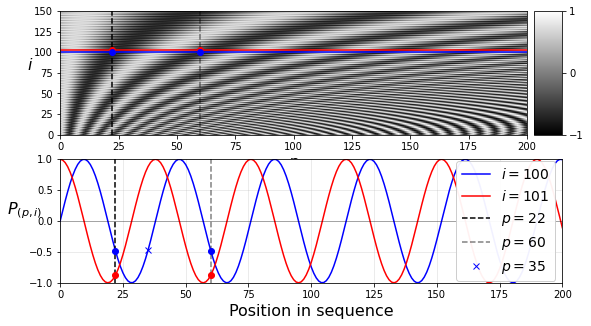

In [92]:
i1, i2, crop_i = 100, 101, 150  # Ë£ÅÂàáÂàÜÈáèËá≥150
p1, p2, p3 = 22, 60, 35
fig, (ax2, ax1) = plt.subplots(
    nrows=2,
    ncols=1,  # sharex=True, 
    figsize=(9, 5))

#########
im = ax2.imshow(PE.T[:crop_i],
                cmap="gray",
                interpolation="bilinear",
                aspect="auto")
ax2.hlines(y=i1, xmin=0, xmax=max_steps - 1, color="b")  # ÁªòÂà∂Ê∞¥Âπ≥Á∫ø
cheat = 2  # ÈúÄË¶ÅÂ∞ÜÁ∫¢Á∫øÊä¨È´ò‰∏ÄÁÇπÔºåÂê¶Âàô‰ºöÈöêËóèËìùÁ∫ø
ax2.hlines(i2 + cheat, 0, max_steps - 1, color="r")

ax2.plot([p1, p1], [0, crop_i], "k--")
ax2.plot([p2, p2], [0, crop_i], "k--", alpha=0.5)
ax2.plot([p1, p2], [i2 + cheat, i2 + cheat], "ro")
ax2.plot([p1, p2], [i1, i1], "bo")

ax2.axis([0, max_steps - 1, 0, crop_i])
ax2.set_xlabel("$p$", fontsize=16)
ax2.set_ylabel("$i$", rotation=0, fontsize=16)
#########
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='6%', pad=0.1)
cb = fig.colorbar(im, cax=cax, orientation="vertical")
cb.set_ticks([-1, 0, 1])
cb.update_ticks()
#########
ax1.plot(PE[:, i1], "b-", label="$i = {}$".format(i1))
ax1.plot(PE[:, i2], "r-", label="$i = {}$".format(i2))

ax1.plot([p1, p1], [-1, 1], "k--", label="$p = {}$".format(p1))
ax1.plot([p2, p2], [-1, 1], "k--", label="$p = {}$".format(p2), alpha=0.5)
ax1.plot(p3, PE[p3, i1], "bx", label="$p = {}$".format(p3))

ax1.plot([p1, p2], [PE[p1, i1], PE[p2, i1]], "bo")
ax1.plot([p1, p2], [PE[p1, i2], PE[p2, i2]], "ro")

ax1.legend(loc="center right", fontsize=14, framealpha=0.95)
ax1.set_ylabel("$P_{(p,i)}$", rotation=0, fontsize=16)

ax1.grid(True, alpha=0.3)
ax1.hlines(0, 0, max_steps - 1, color="k", linewidth=1, alpha=0.3)
ax1.axis([0, max_steps - 1, -1, 1])
ax1.set_xlabel( "Position in sequence", fontsize=16)

plt.show()

- Êé•‰∏ãÊù•,ÂàõÂª∫`Transformer`ÁöÑÁ¨¨‰∏ÄÂ±Ç:

In [93]:
embed_size = 512
max_steps = 500
vocab_size = 10000

In [94]:
embeddings = keras.layers.Embedding(vocab_size, embed_size)
position_encoding = PositionalEncoding(max_steps=max_steps,
                                       max_dims=embed_size)

# ÁºñÁ†ÅÂô®
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
encoder_embeddings = embeddings(encoder_inputs)
encoder_in = position_encoding(encoder_embeddings)

# Ëß£Á†ÅÂô®
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
decoder_embeddings = embeddings(decoder_inputs)
decoder_in = position_encoding(decoder_embeddings)

### Áº©ÊîæÁÇπÁßØÊ≥®ÊÑèÂäõ Scaled Dot-Product Attention

> Áº©ÊîæÁÇπÁßØÊ≥®ÊÑèÂäõ:
> $$\operatorname{Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V})=\operatorname{softmax}\left(\frac{\mathbf{Q} \mathbf{K}^{\top}}{\sqrt{d_{k e y s}}}\right) \mathbf{V}$$

- Âú®`ÁºñÁ†ÅÂô®`‰∏≠ÔºåËøô‰∏™Á≠âÂºèÂ∫îÁî®‰∫éÊâπÂ§ÑÁêÜ‰∏≠ÁöÑ**ÊØè‰∏™ËæìÂÖ•Âè•Â≠ê**ÔºåÂÖ∂‰∏≠$Q$„ÄÅ$K$Âíå$V$ÈÉΩÁ≠â‰∫éËæìÂÖ•Âè•Â≠ê‰∏≠ÁöÑÂçïËØçÂàóË°®`(Embeddings+Positional Embeddings)`,Âõ†Ê≠§Âè•Â≠ê‰∏≠ÁöÑÊØè‰∏™ÂçïËØçÈÉΩ‰ºöËøõË°åÊØîËæÉÂêå‰∏ÄÂè•Â≠ê‰∏≠ÁöÑÊØè‰∏™ÂçïËØçÔºåÂåÖÊã¨ÂÆÉËá™Â∑±„ÄÇ
- Âú®`Ëß£Á†ÅÂô®`ÁöÑ `masked attention` Â±Ç‰∏≠ÔºåÁ≠âÂºèÂ∞ÜÂ∫îÁî®‰∫éÊâπÂ§ÑÁêÜ‰∏≠ÁöÑ**ÊØè‰∏™ÁõÆÊ†áÂè•Â≠ê**ÔºåÂÖ∂‰∏≠ $Q$„ÄÅ$K$Âíå$V$ÈÉΩÁ≠â‰∫éÁõÆÊ†áÂè•Â≠ê‰∏≠ÁöÑÂçïËØçÂàóË°®Ôºå‰ΩÜËøôÊ¨°‰ΩøÁî®‰∫ÜÊé©Á†ÅÊù•Èò≤Ê≠¢‰ªª‰ΩïÂçïËØç‰∏é‰Ωç‰∫éÂÆÉ‰πãÂêéÁöÑÂçïËØçËøõË°åÊØîËæÉ(Âú®Êé®ÁêÜÊó∂ÔºåËß£Á†ÅÂô®Âè™ËÉΩËÆøÈóÆÂÆÉÂ∑≤ÁªèËæìÂá∫ÁöÑÂçïËØçÔºåËÄå‰∏çÊòØÂ∞ÜÊù•ÁöÑÂçïËØçÔºåÂõ†Ê≠§Âú®ËÆ≠ÁªÉÊúüÈó¥Êàë‰ª¨ÂøÖÈ°ªÂ±èËîΩÊú™Êù•ÁöÑËæìÂá∫‰ª§Áâå)„ÄÇ
- Âú®`Ëß£Á†ÅÂô®`ÁöÑÊ≥®ÊÑèÂäõÂ±Ç‰∏äÈÉ®ÔºåÈîÆ $K$ ÂíåÂÄº $V$ Âè™ÊòØ`ÁºñÁ†ÅÂô®`ÁîüÊàêÁöÑÂçïËØçÁºñÁ†ÅÂàóË°®ÔºåÊü•ËØ¢ $Q$ ÊòØ`Ëß£Á†ÅÂô®`ÁîüÊàêÁöÑÂçïËØçÁºñÁ†ÅÂàóË°®„ÄÇ

> Âú®TensorFlow‰∏≠ÔºåÂ¶ÇÊûú $A$ Âíå $B$ ÊòØÂÖ∑Êúâ‰∏§‰∏™‰ª•‰∏äÁª¥Â∫¶ÁöÑÂº†Èáè(‰æãÂ¶ÇÔºåÂΩ¢Áä∂ÂàÜÂà´‰∏∫ `[2, 3, 4, 5]` Âíå `[2, 3, 5, 6]`)ÔºåÂàô `tf.matmul(A, B)`‰ºöÂ∞ÜËøô‰∫õÂº†ÈáèËßÜ‰∏∫ 2 √ó 3 Êï∞ÁªÑÔºåÂÖ∂‰∏≠ÊØè‰∏™ÂçïÂÖÉÈÉΩÂåÖÂê´‰∏Ä‰∏™Áü©ÈòµÔºåÂπ∂Â∞ÜÁõ∏Â∫îÁöÑÁü©ÈòµÁõ∏‰πòÔºö
>
> $A$ ‰∏≠ÁöÑÁ¨¨$i$Ë°åÂíåÁ¨¨$j$ÂàóÁöÑÁü©ÈòµÂ∞Ü‰πò‰ª• $B$ ‰∏≠ÁöÑÁ¨¨$i$Ë°åÂíåÁ¨¨$j$ÂàóÁöÑÁü©Èòµ„ÄÇ
>
> ‰∏Ä‰∏™ 4 √ó 5 Áü©ÈòµÂíå‰∏Ä‰∏™ 5 √ó 6 Áü©ÈòµÊòØ‰∏Ä‰∏™ 4 √ó 6 Áü©ÈòµÔºå`tf.matmul(A, B)` Â∞ÜËøîÂõû‰∏Ä‰∏™ÂΩ¢Áä∂‰∏∫ `[2, 3, 4, 6]` ÁöÑÊï∞ÁªÑ„ÄÇ

- `Kears`‰∏≠ÁöÑ`kears.layers.Attention`Â±ÇÂÆûÁé∞Áº©ÊîæÁÇπÁßØÊ≥®ÊÑèÂäõ
    - `use_scale=True`: ÂàõÂª∫‰∏Ä‰∏™ÈôÑÂä†ÂèÇÊï∞, ËÆ©Â±ÇÂ≠¶‰π†Â¶Ç‰ΩïÊ≠£Á°ÆÁº©Â∞èÁõ∏‰ººÂ∫¶ÂàÜÊï∞, ËÄå‰∏çÊòØ`transformer`‰∏≠Âõ∫ÂÆöÁöÑÂõ†Â≠ê${\sqrt{d_{k e y s}}}$Êù•Èôç‰ΩéÁõ∏‰ººÂ∫¶ÂàÜÊï∞.
    - `causal=True`: ÂèØÁ°Æ‰øùÊØè‰∏™ËæìÂá∫‰ª§Áâå‰ªÖÊ≥®ÊÑèÂÖàÂâçÁöÑËæìÂá∫‰ª§Áâå, ËÄå‰∏çÊòØÂ∞ÜÊù•ÁöÑ.

- ËøôÊòØ‰∏Ä‰∏™ÁÆÄÂåñÁöÑ `Transformer`ÔºàÂÆûÈôÖÊû∂ÊûÑÊúâË∑≥ËøáËøûÊé•„ÄÅÂ±ÇËåÉÊï∞„ÄÅÂØÜÈõÜÁΩëÁªúÔºåÊúÄÈáçË¶ÅÁöÑÊòØÂÆÉ‰ΩøÁî® Multi-Head Attention ËÄå‰∏çÊòØÂ∏∏ËßÑ AttentionÔºâ

In [95]:
# ÁºñÁ†ÅÂô®
# encoder_in = position_encoding(encoder_embeddings)
Z = encoder_in

for N in range(6):
    # input:( [query_seq_encoding, value_seq_encoding])
    Z = keras.layers.Attention(use_scale=True)([Z, Z])
encoder_outputs = Z

In [96]:
# Ëß£Á†ÅÂô®
# decoder_in = position_encoding(decoder_embeddings)
Z = decoder_in
for N in range(6):
    Z = keras.layers.Attention(use_scale=True, causal=True)([Z, Z])
    Z = keras.layers.Attention(use_scale=True)([Z, encoder_outputs])

outputs = keras.layers.TimeDistributed(
    keras.layers.Dense(vocab_size, activation="softmax"))(Z)

### Â§öÂ§¥Ê≥®ÊÑèÂäõ Multi-Head Attention

<img src="../images/other/16-24.png" width="200">
<img src="../images/other/16-25.png">

ÂµåÂÖ•ÁöÑ‰∏çÂêåÈÉ®ÂàÜÂèØ‰ª•Â≠¶‰π†ÊØè‰∏™ÂçïËØçÂê´‰πâÁöÑ‰∏çÂêåÊñπÈù¢ÔºåÂõ†‰∏∫ÂÆÉ‰∏éÂ∫èÂàó‰∏≠ÁöÑÂÖ∂‰ªñÂçïËØçÁõ∏ÂÖ≥„ÄÇËøôÂÖÅËÆ∏ `Transformer` ÊçïËé∑ÂØπÂ∫èÂàóÁöÑÊõ¥‰∏∞ÂØåÁöÑËß£Èáä„ÄÇ
<img src="../images/other/16-55.png">

> Â∞èÁªì:
> 1. `__init__`‰∏ªË¶ÅÁî®Êù•ÂÅöÂèÇÊï∞ÂàùÂßãÂåñÁî®ÔºåÊØîÂ¶ÇÊàë‰ª¨Ë¶ÅÂàùÂßãÂåñÂç∑ÁßØÁöÑ‰∏Ä‰∫õÂèÇÊï∞ÔºåÂ∞±ÂèØ‰ª•ÊîæÂà∞ËøôÈáåÈù¢
> 2. `call`ÂèØ‰ª•ÊääÁ±ªÂûãÁöÑÂØπË±°ÂΩìÂÅöÂáΩÊï∞Êù•‰ΩøÁî®ÔºåËøô‰∏™ÂØπË±°ÂèØ‰ª•ÊòØÂú®`__init__`ÈáåÈù¢‰πüÂèØ‰ª•ÊòØÂú®`build`ÈáåÈù¢
> 3. `build`‰∏ÄËà¨ÊòØÂíå`call`Êê≠ÈÖç‰ΩøÁî®ÔºåËøô‰∏™Êó∂ÂÄôÔºåÂÆÉÁöÑÂäüËÉΩÂíå`__init__`ÂæàÁõ∏‰ººÔºåÂΩì`build`‰∏≠Â≠òÊîæÊú¨Â±ÇÈúÄË¶ÅÂàùÂßãÂåñÁöÑÂèòÈáèÔºåÂΩì`call`Ë¢´Á¨¨‰∏ÄÊ¨°Ë∞ÉÁî®ÁöÑÊó∂ÂÄôÔºå‰ºöÂÖàÊâßË°å`build()`ÊñπÊ≥ïÂàùÂßãÂåñÂèòÈáèÔºå‰ΩÜÂêéÈù¢ÂÜçË∞ÉÁî®Âà∞`call`ÁöÑÊó∂ÂÄôÔºåÊòØ‰∏ç‰ºöÂÜçÂéªÊâßË°å`build()`ÊñπÊ≥ïÂàùÂßãÂåñÂèòÈáè

ËØ∑Ê≥®ÊÑèÔºåÂÖ∑Êúâ `kernel_size=1`, Âπ∂‰∏îÈªòËÆ§ `padding="valid"` Âíå `strides=1`ÁöÑ `Conv1D` Â±ÇÁ≠âÊïà‰∫é `Time Distributed(Dense(...))` Â±Ç.

In [97]:
K = keras.backend

In [98]:
class MultiHeadAttention(keras.layers.Layer):

    def __init__(self, n_heads, use_scale=False, causal=False, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.n_heads = n_heads
        self.use_scale = use_scale
        self.causal = causal

    def build(self, batch_input_shape):
        super(MultiHeadAttention, self).build(batch_input_shape)
        self.dims = batch_input_shape[0][-1]  # 512
        # ‰ΩøÁî®8‰∏™Â§¥ --> d_k = d_v = d_model/h = 64.
        self.q_dims, self.v_dims, self.k_dims = [self.dims // self.n_heads] * 3

        # Á∫øÊÄßÂ±Ç
        self.q_linear = keras.layers.Conv1D(
            filters=self.n_heads * self.q_dims,  # Embedding_dim
            kernel_size=1,  # ÈªòËÆ§ stride=1, padding="valid"
            use_bias=False)
        self.v_linear = keras.layers.Conv1D(filters=self.n_heads * self.v_dims,
                                            kernel_size=1,
                                            use_bias=False)
        self.k_linear = keras.layers.Conv1D(filters=self.n_heads * self.k_dims,
                                            kernel_size=1,
                                            use_bias=False)

        self.attention = keras.layers.Attention(causal=self.causal,
                                                use_scale=self.use_scale)
        self.out_linear = keras.layers.Conv1D(self.dims,
                                              kernel_size=1,
                                              use_bias=False)

    def _multi_head_linear(self, inputs, linear):
        shape = K.concatenate([
            K.shape(inputs)[:-1],  # Èô§‰∫Üdims
            [self.n_heads, -1]
        ])  # [n_heads, q_dims OR v_dims OR k_dims]

        projected = K.reshape(linear(inputs), shape)  # Â±ïÂπ≥
        #  (Batch_size, n_Sequence, n_heads, q_dims OR v_dims OR k_dims)
        # ‰∫§Êç¢Â§¥ÈÉ®ÂíåÂ∫èÂàóÁª¥Â∫¶
        perm = K.permute_dimensions(projected, pattern=[0, 2, 1, 3])
        #  (Batch_size, n_heads, n_Sequence, q_dims OR v_dims OR k_dims)

        # Áî±‰∫é tf.keras Âè™ÊîØÊåÅ 3D ËÆ°ÁÆó
        #  (Batch_size * n_heads, n_Sequence, q_dims OR v_dims OR k_dims)
        return K.reshape(perm, [shape[0] * self.n_heads, shape[1], -1])

    def call(self, inputs, *args, **kwargs):
        q = inputs[0]
        v = inputs[1]
        k = inputs[3] if len(inputs) > 2 else v
        shape = K.shape(q)

        q_proj = self._multi_head_linear(q, self.q_linear)
        v_proj = self._multi_head_linear(v, self.v_linear)
        k_proj = self._multi_head_linear(k, self.k_linear)
        #  (Batch_size * n_heads, n_Sequence, q_dims OR v_dims OR k_dims)
        multi_attended = self.attention([q_proj, v_proj, k_proj])

        shape_attended = K.shape(multi_attended)
        reshaped_attended = K.reshape(
            multi_attended,
            # Batch_size, n_heads,   n_Sequence,       q_dims or Query size
            [shape[0], self.n_heads, shape_attended[1], shape_attended[2]])
        # Â∞ÜÊØè‰∏™Â§¥ÁöÑÊ≥®ÊÑèÂäõÂàÜÊï∞ÂêàÂπ∂Âú®‰∏ÄËµ∑
        # ‰∫§Êç¢Â§¥ÈÉ®ÂíåÂ∫èÂàóÁª¥Â∫¶
        perm = K.permute_dimensions(reshaped_attended, [0, 2, 1, 3])
        concat = K.reshape(perm, [shape[0], shape_attended[1], -1])
        return self.out_linear(concat)

In [99]:
Q = np.random.rand(2, 50, 512)
V = np.random.rand(2, 80, 512)
multi_attn = MultiHeadAttention(8)  #n_heads=8
multi_attn([Q, V]).shape

TensorShape([2, 50, 512])

> create:Apotosome 05/19/22

> update:Apotosome 10/26/22